TOI 836

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/'
x1ds = np.hstack((glob.glob('{}*oeoo*x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17040_sx1.fits'],
      dtype='<U67')

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17010_x1d.fits
G140L
64.04539


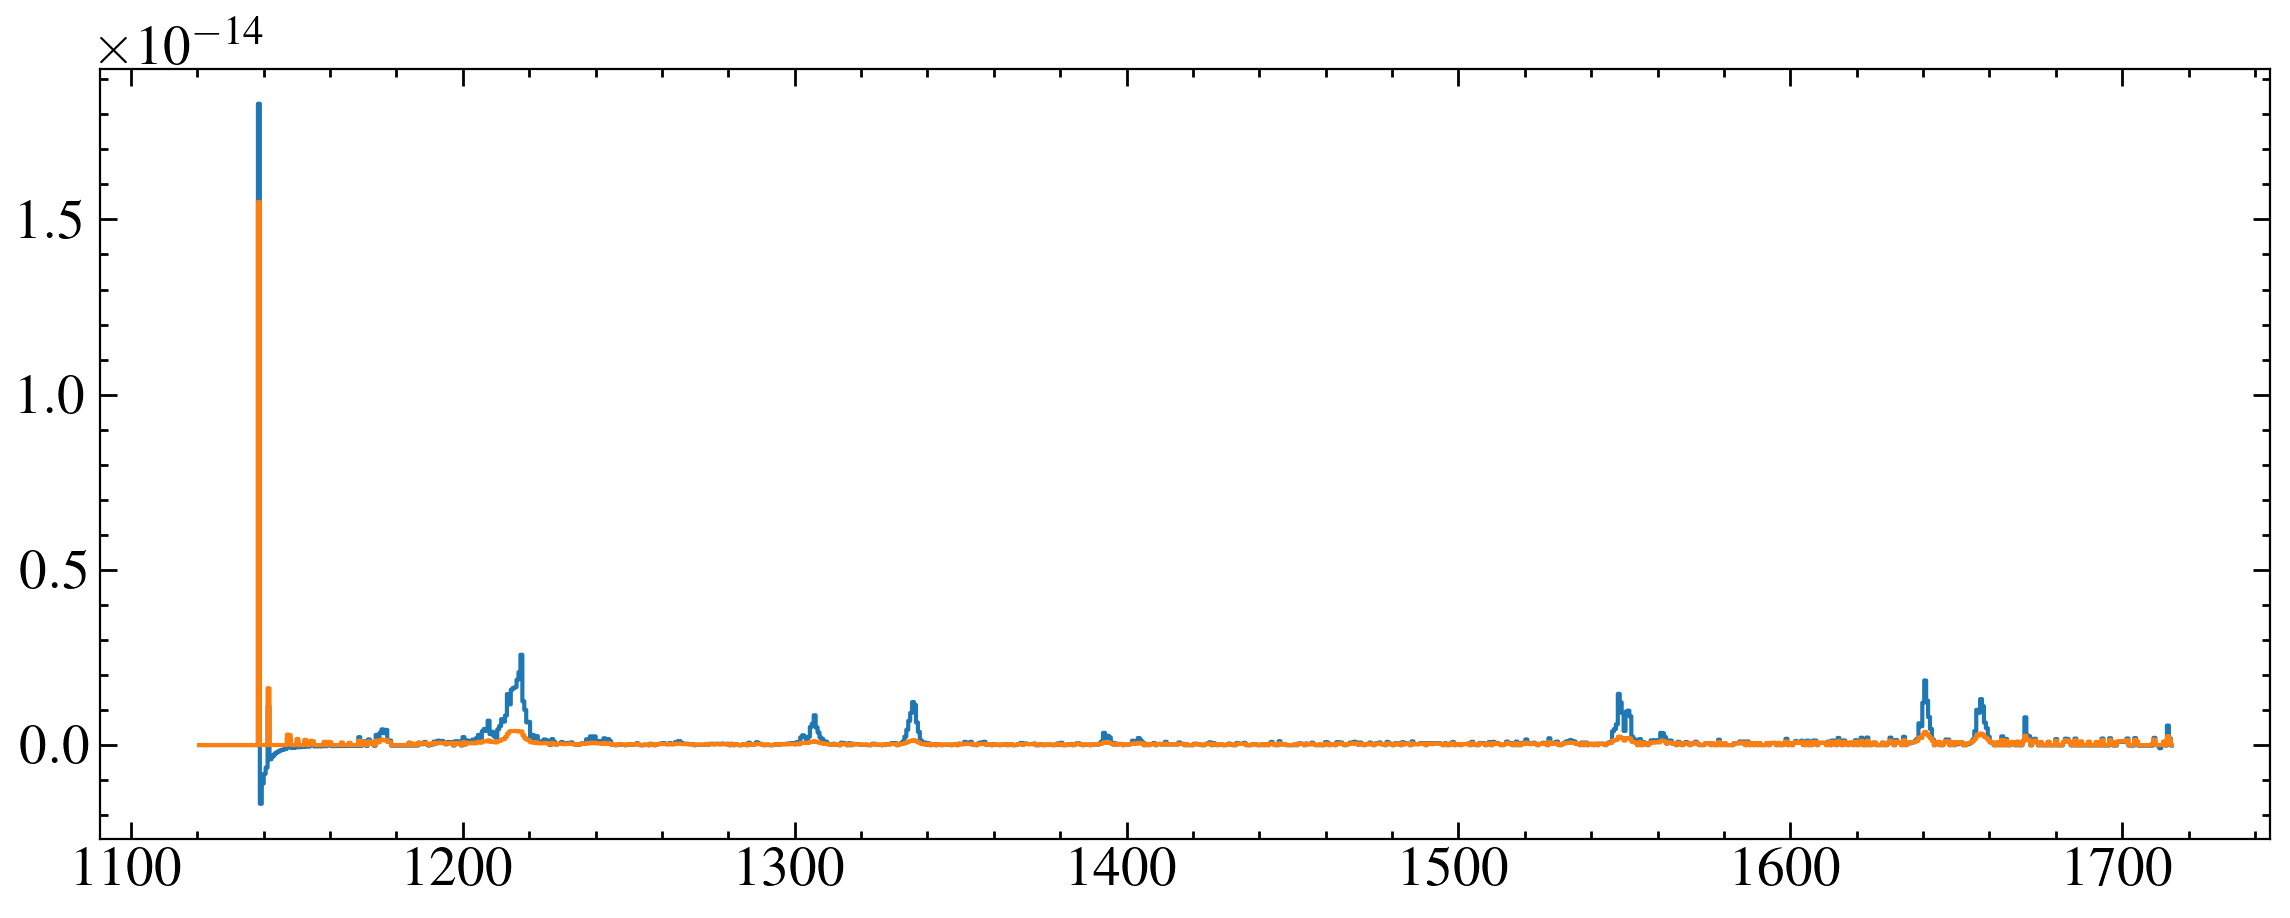

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17030_x1d.fits
G230L
553.5396


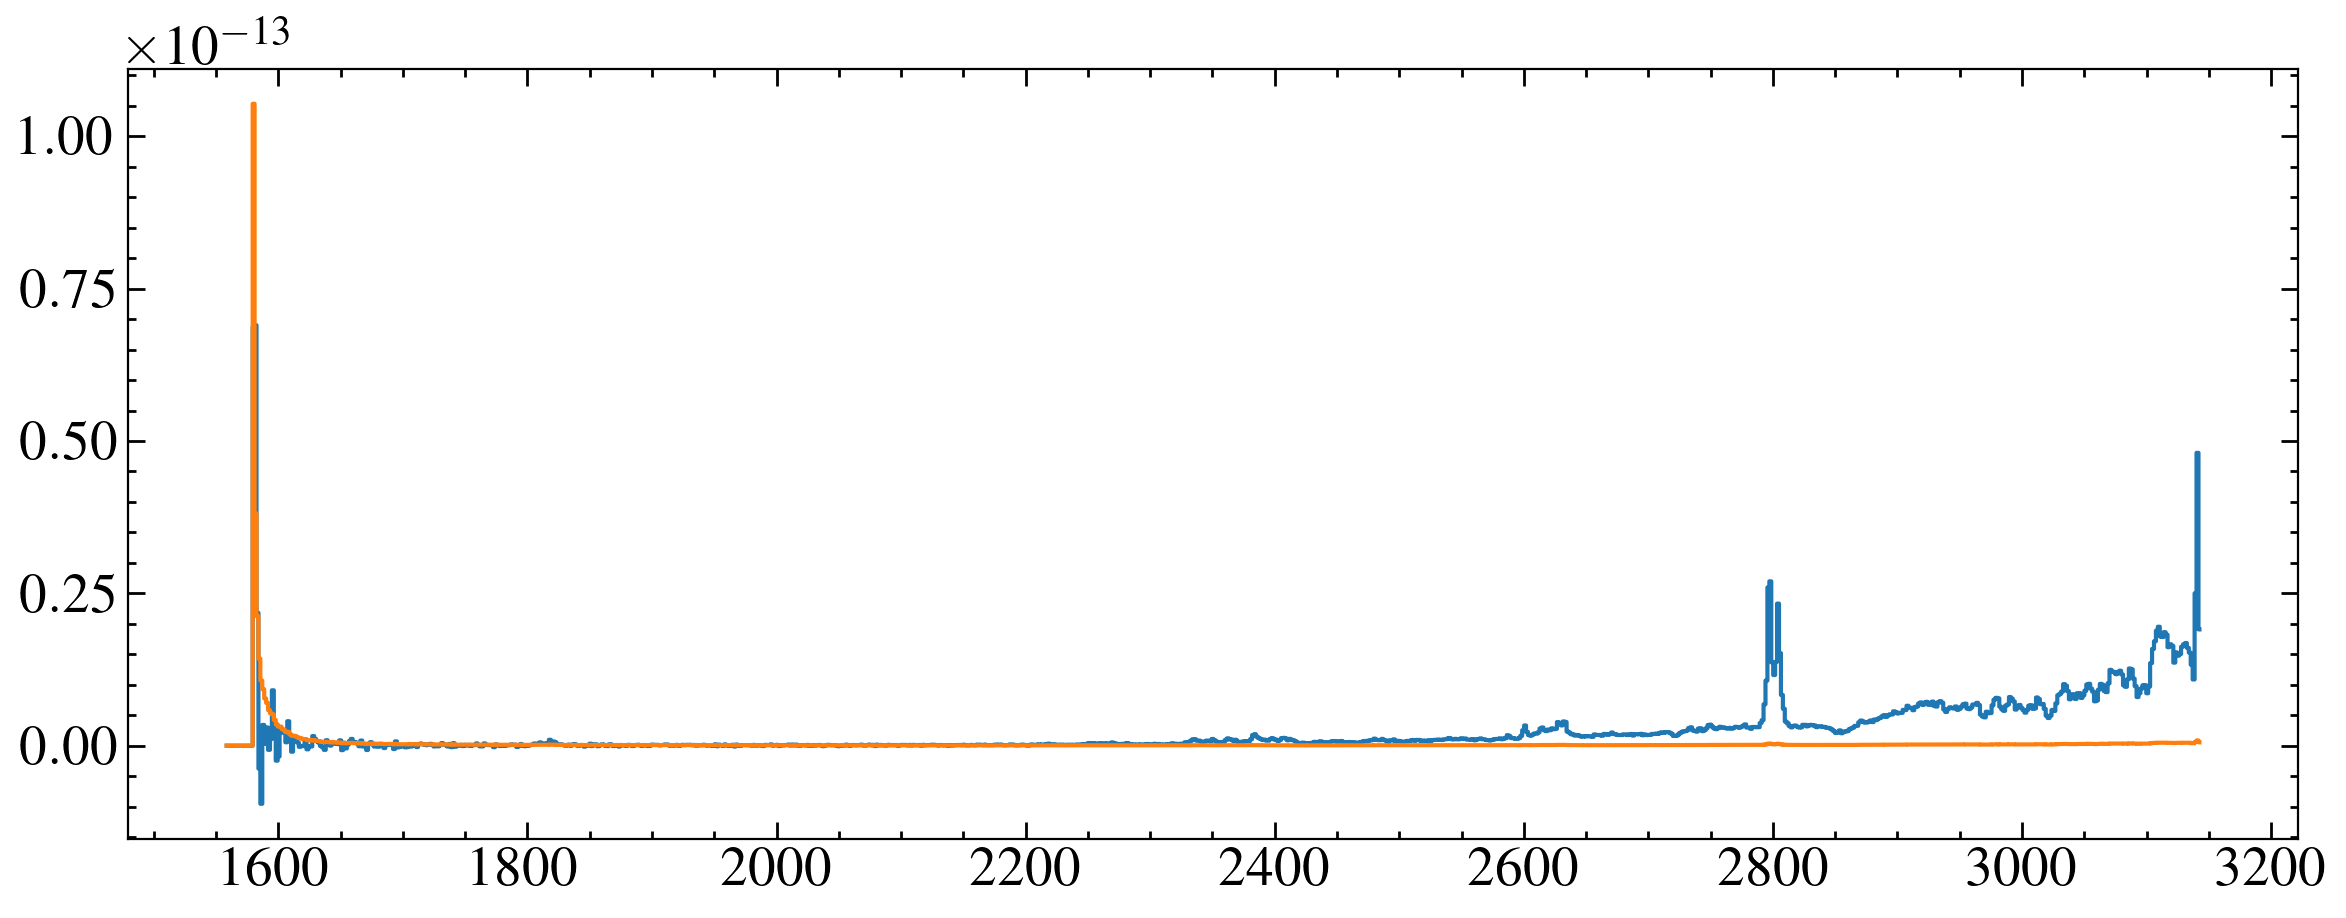

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17020_x1d.fits
G140M
193.58609


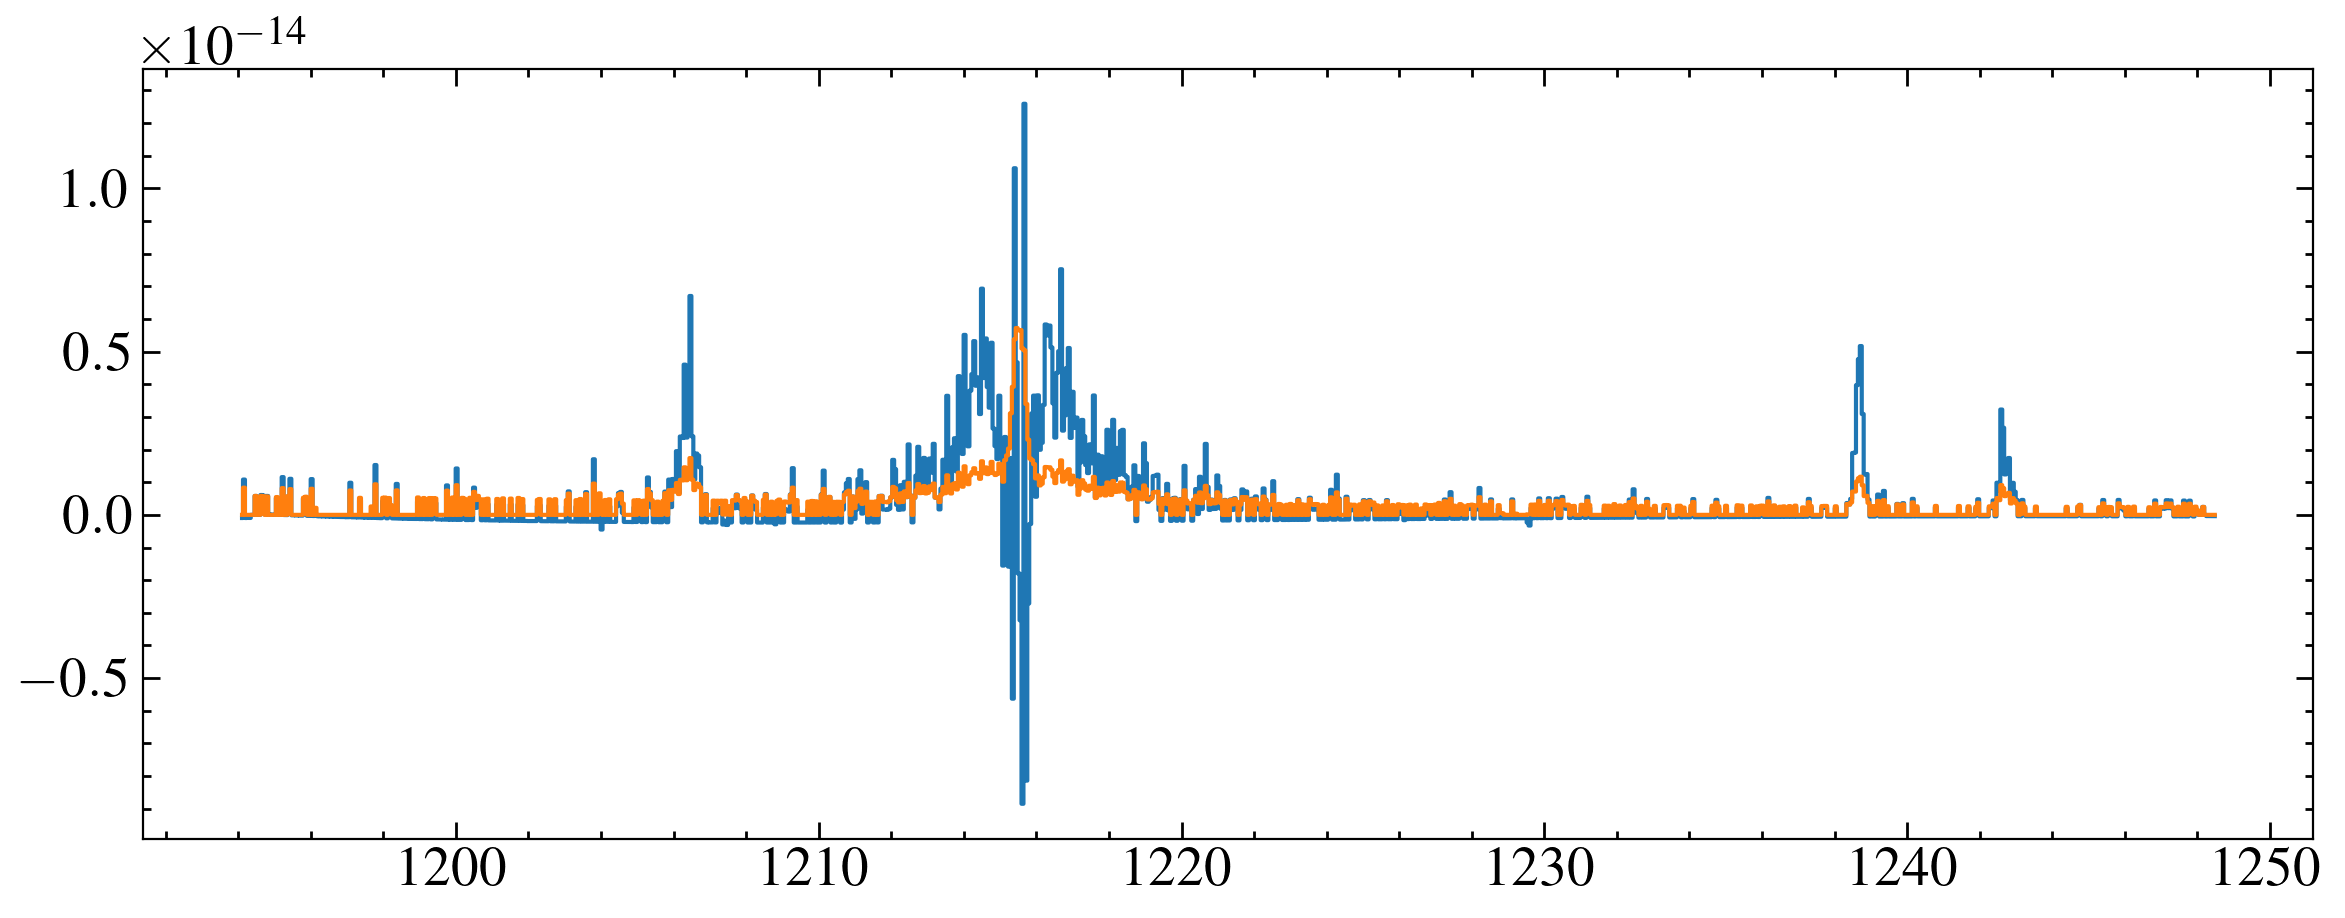

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17040_sx1.fits
G430L
894.9996


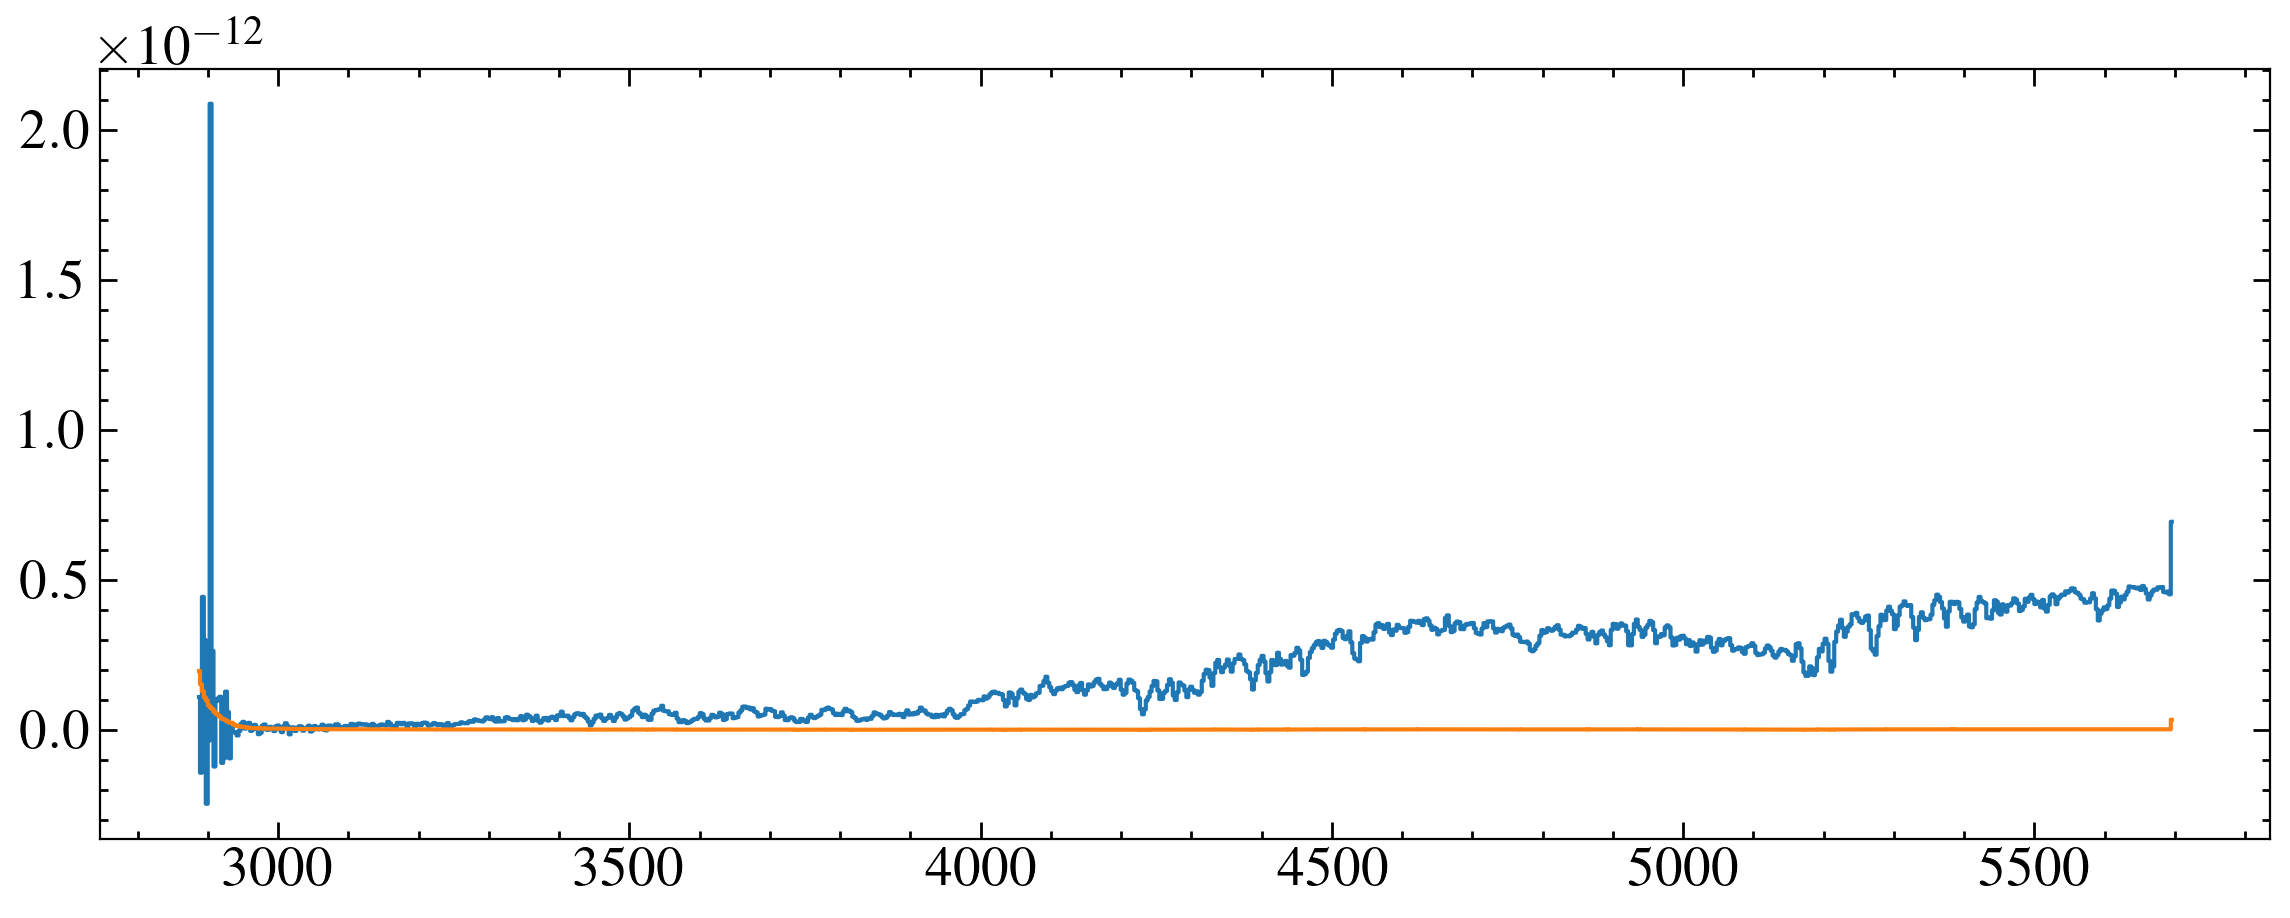

In [3]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # mask = w > 1600
    # w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
    plt.show()
    

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17010_x1d.fits
G140L
64.04539


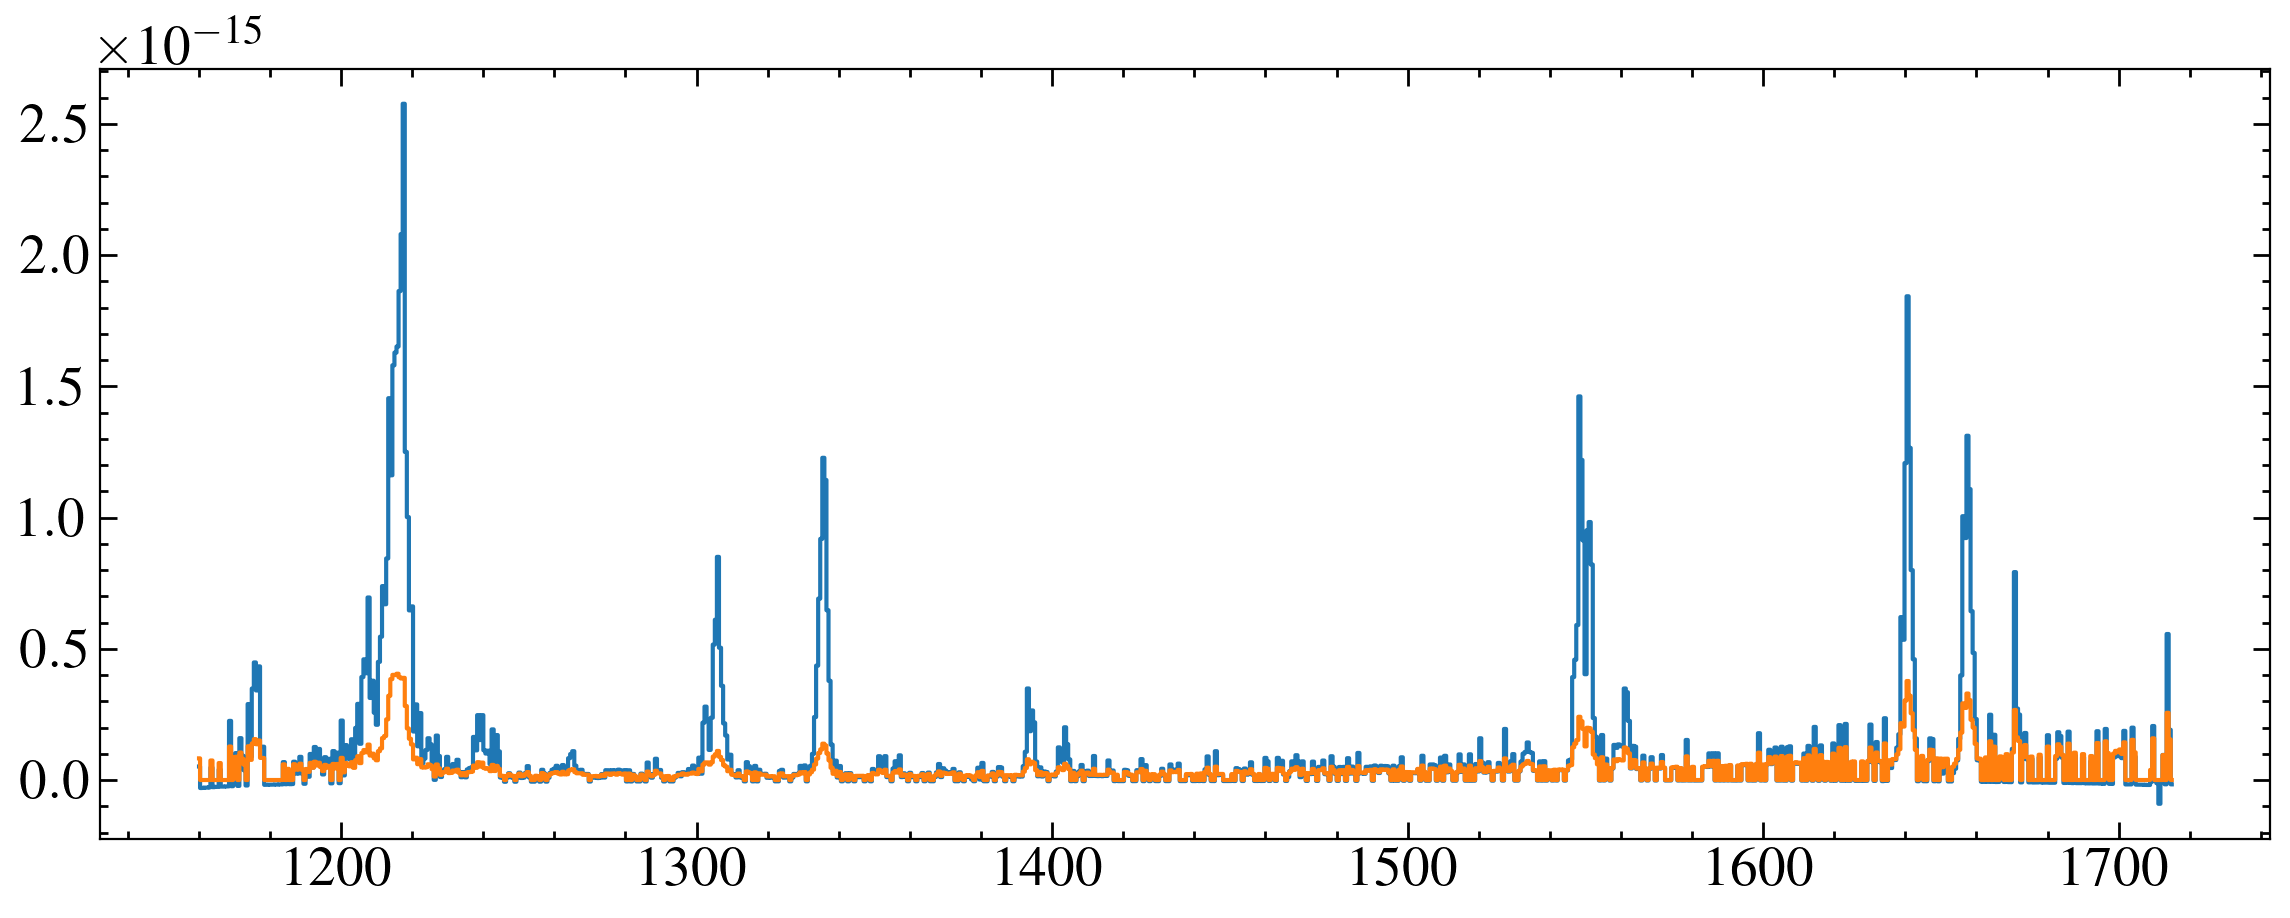

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17030_x1d.fits
G230L
553.5396


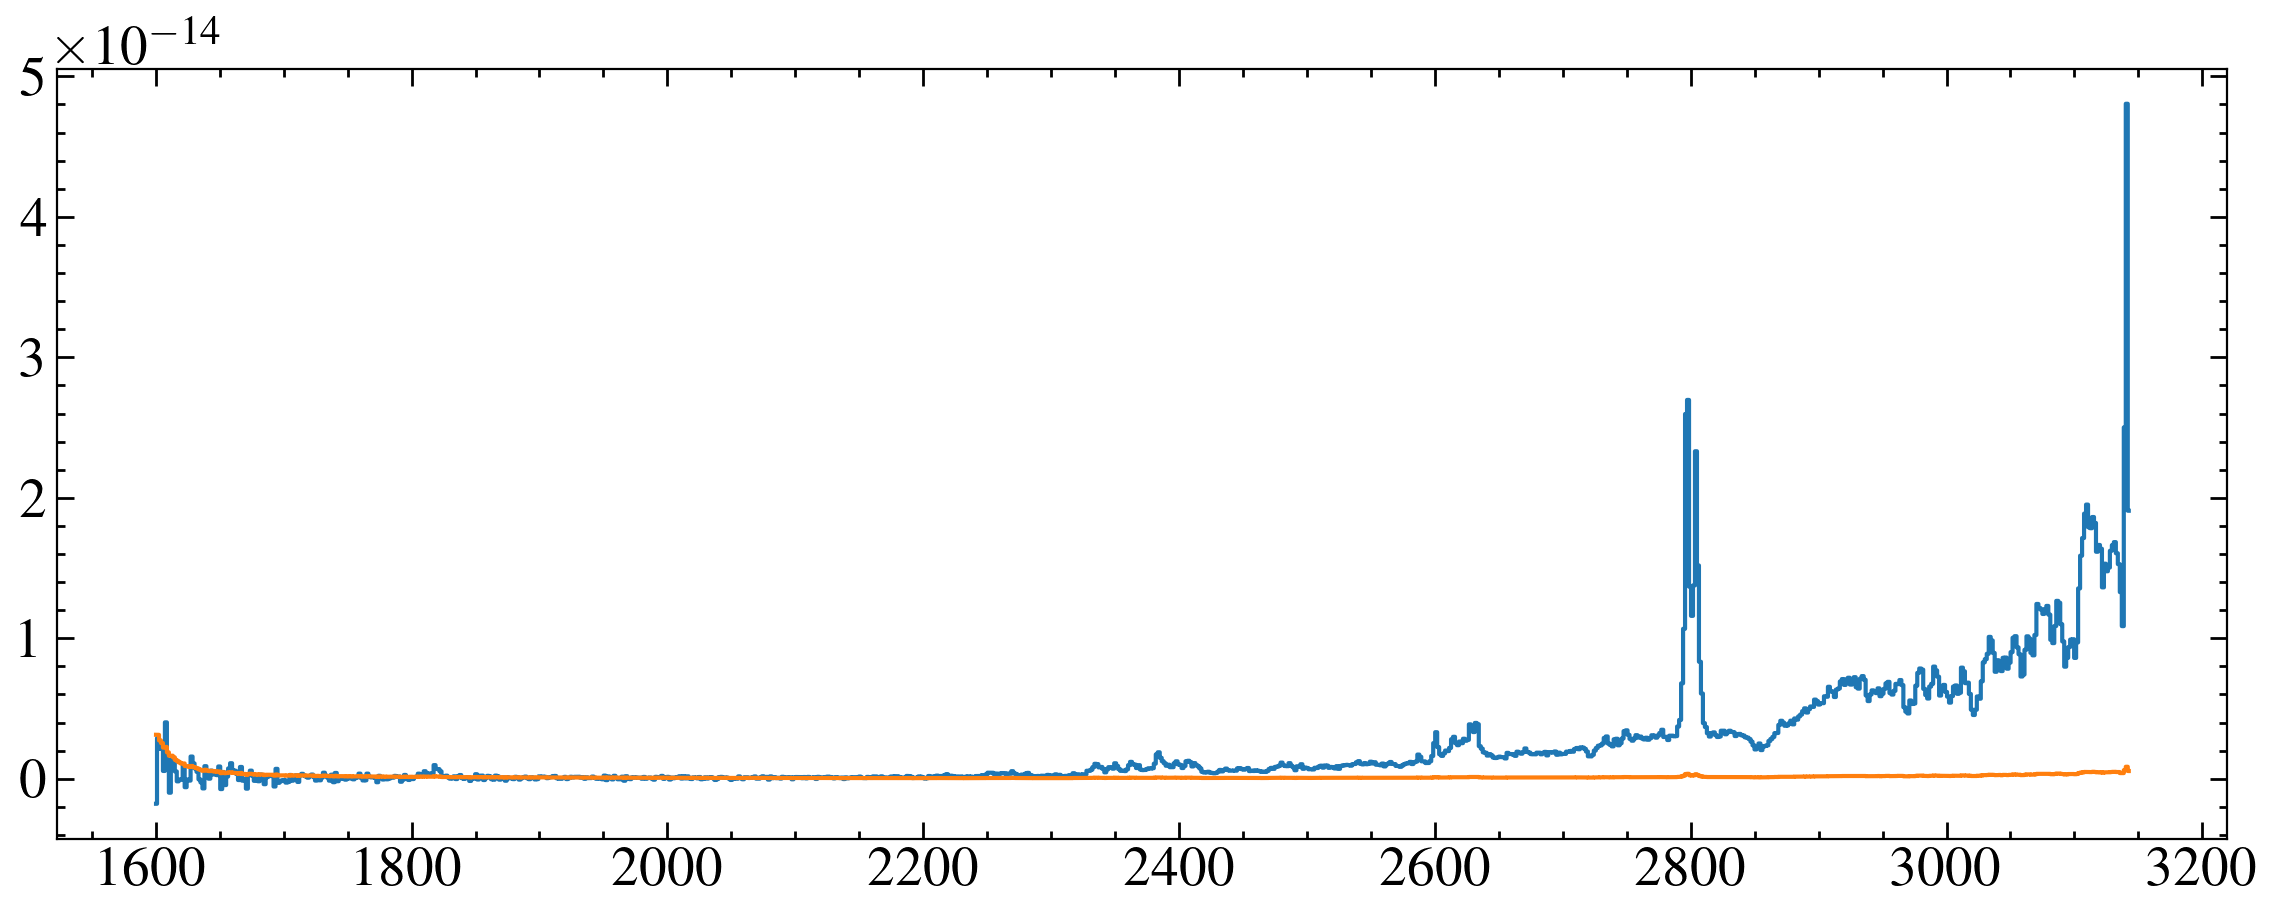

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17020_x1d.fits
G140M
193.58609


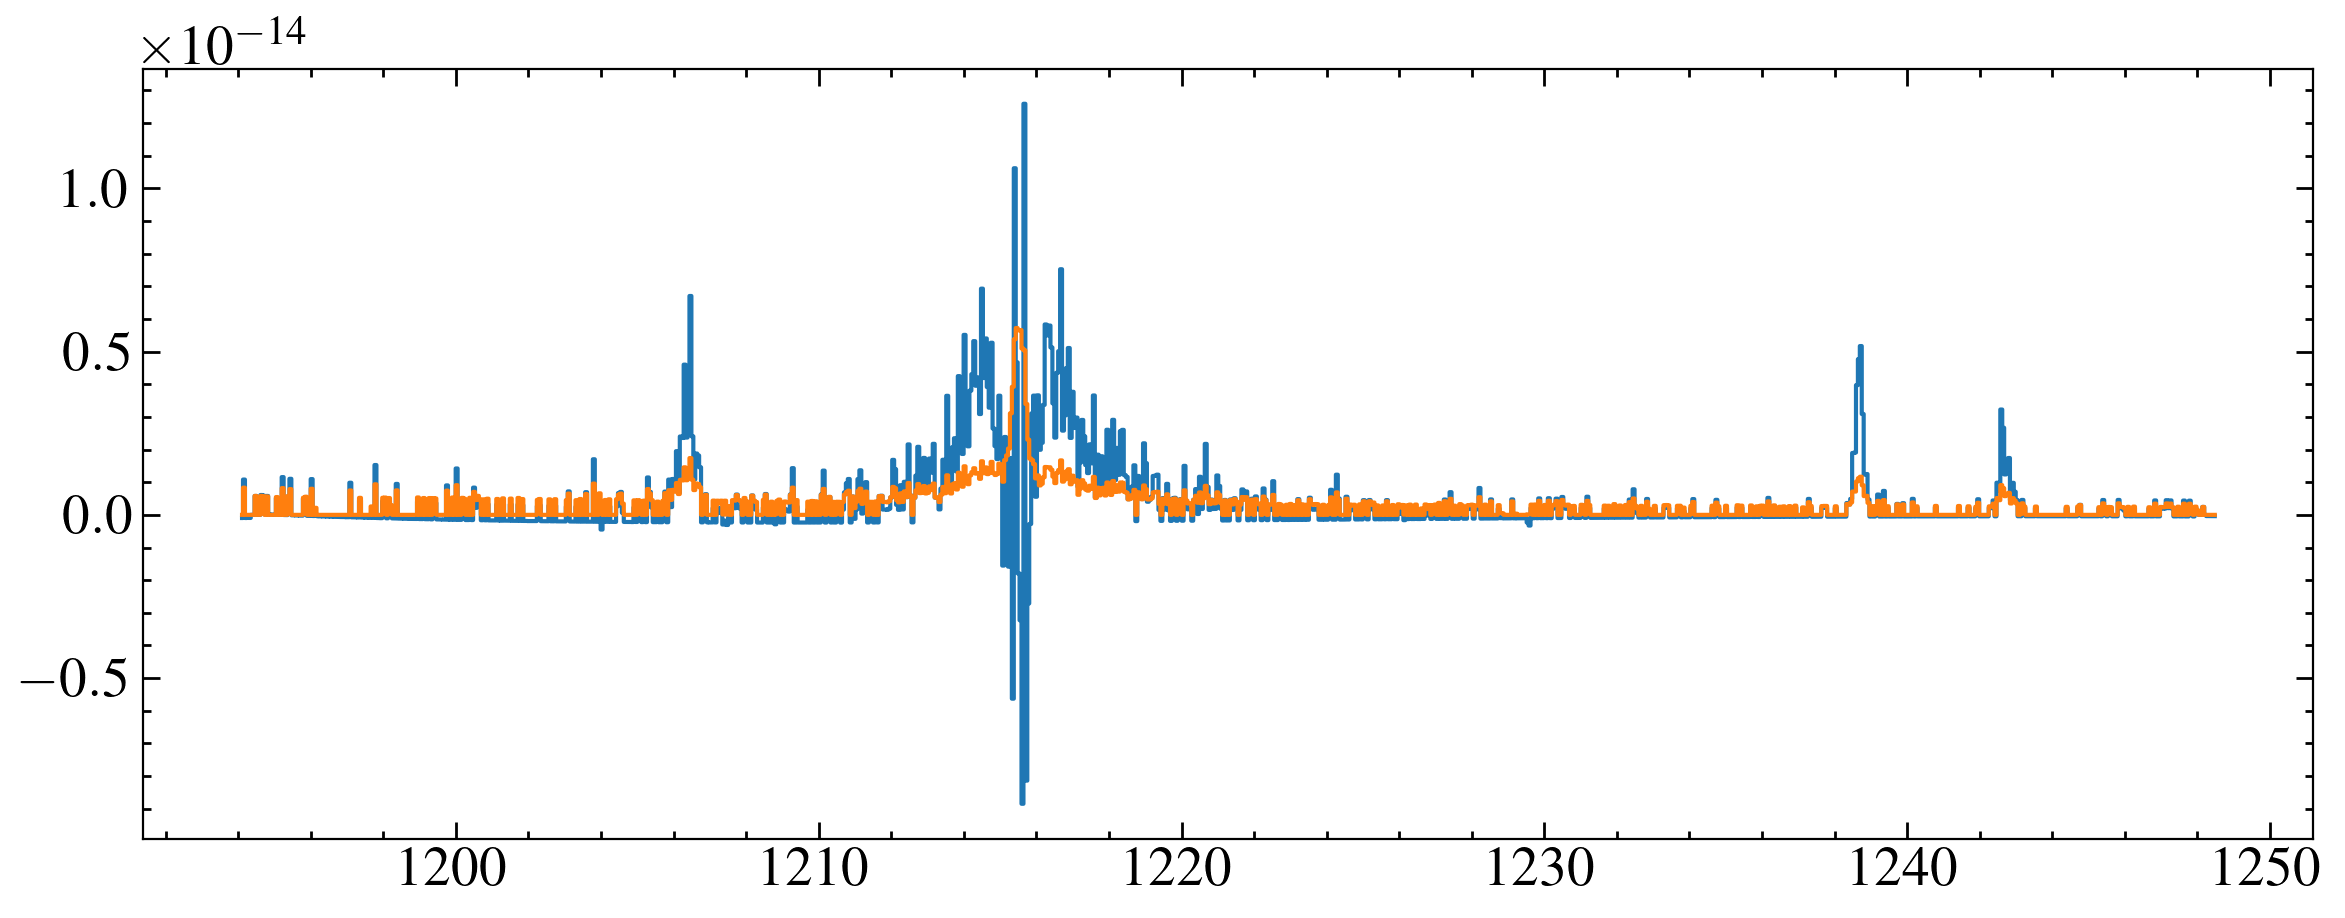

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17040_sx1.fits
G430L
894.9996


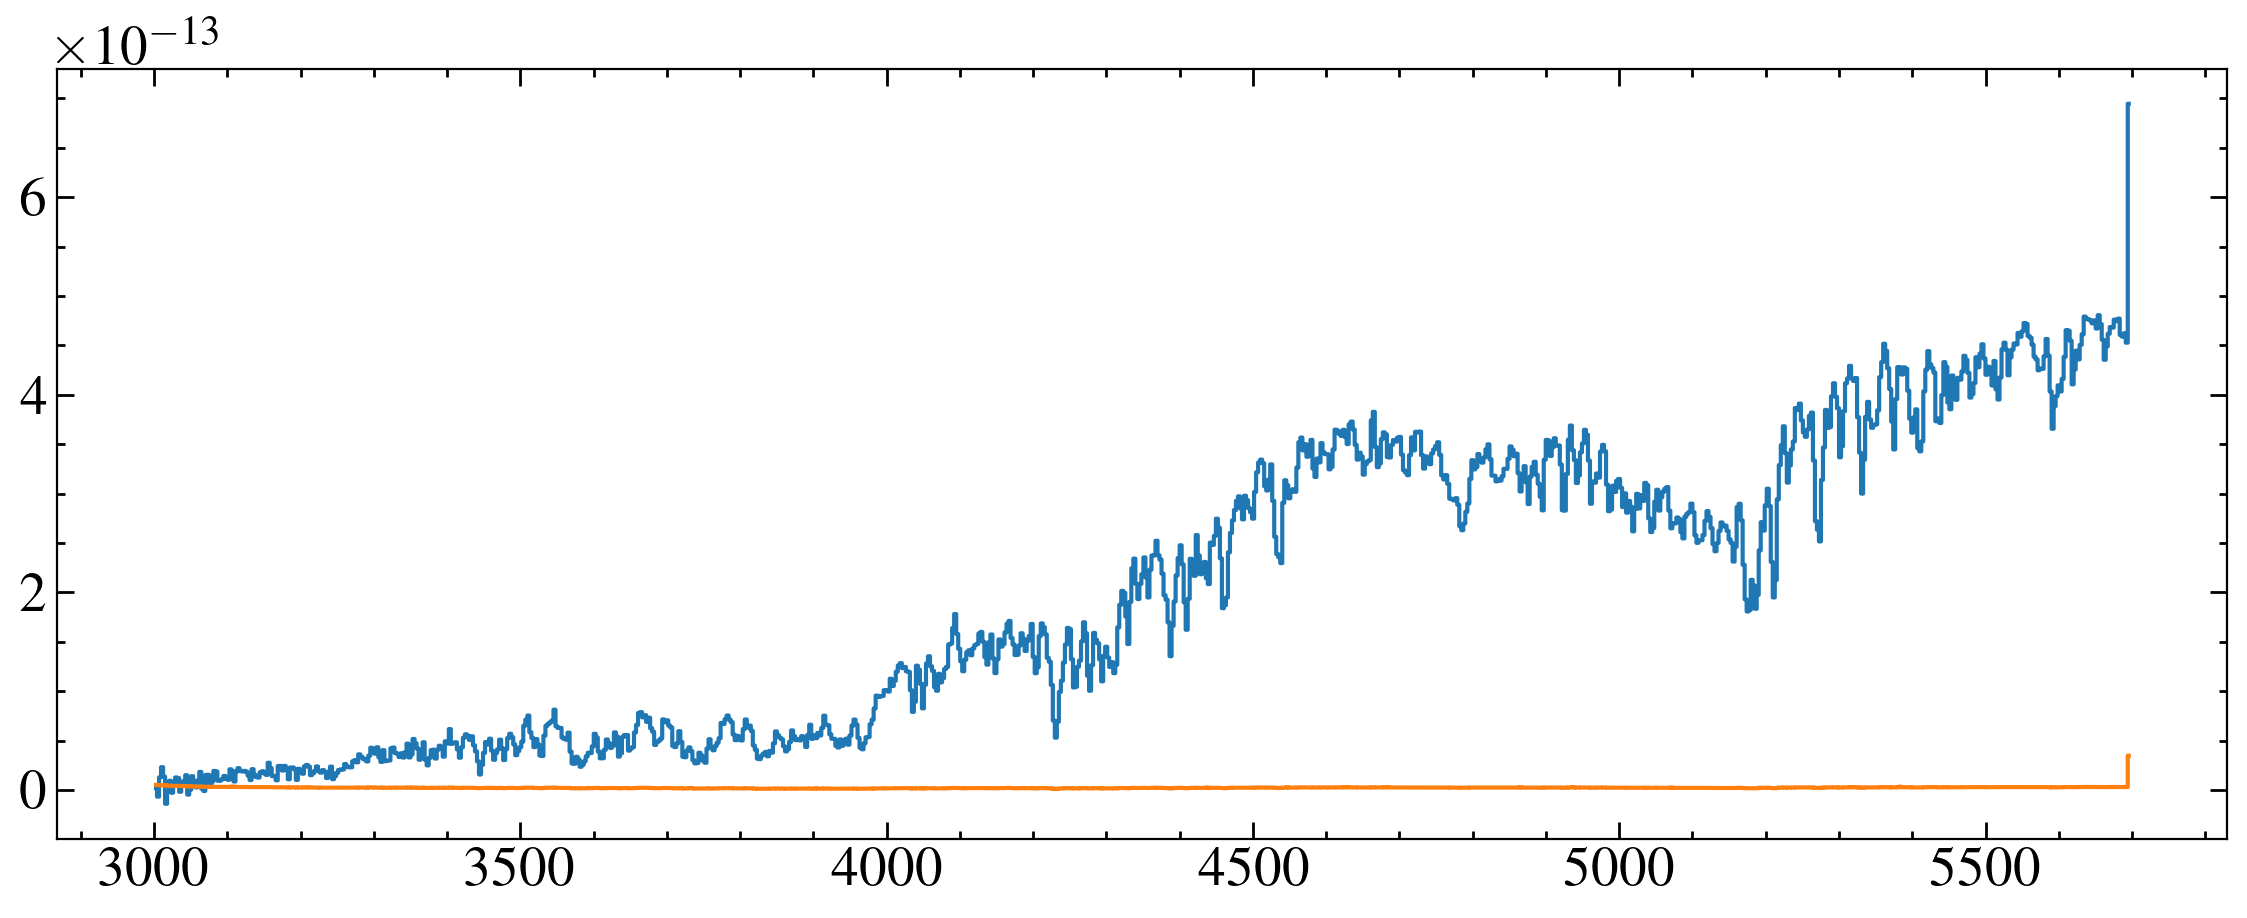

In [4]:
for x in x1ds:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating in ['G140L', 'G140M']:
        mask = w > 1160
    elif grating == 'G230L':
        mask = w > 1600
    elif grating =='G430L':
        mask = w > 3000
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
    plt.show()
    

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17040_sx1.fits
G430L
894.9996
/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17020_x1d.fits
G140M
193.58609
/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17030_x1d.fits
G230L
553.5396
/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17010_x1d.fits
G140L
64.04539


(1e-17, 1.6003522855914745e-12)

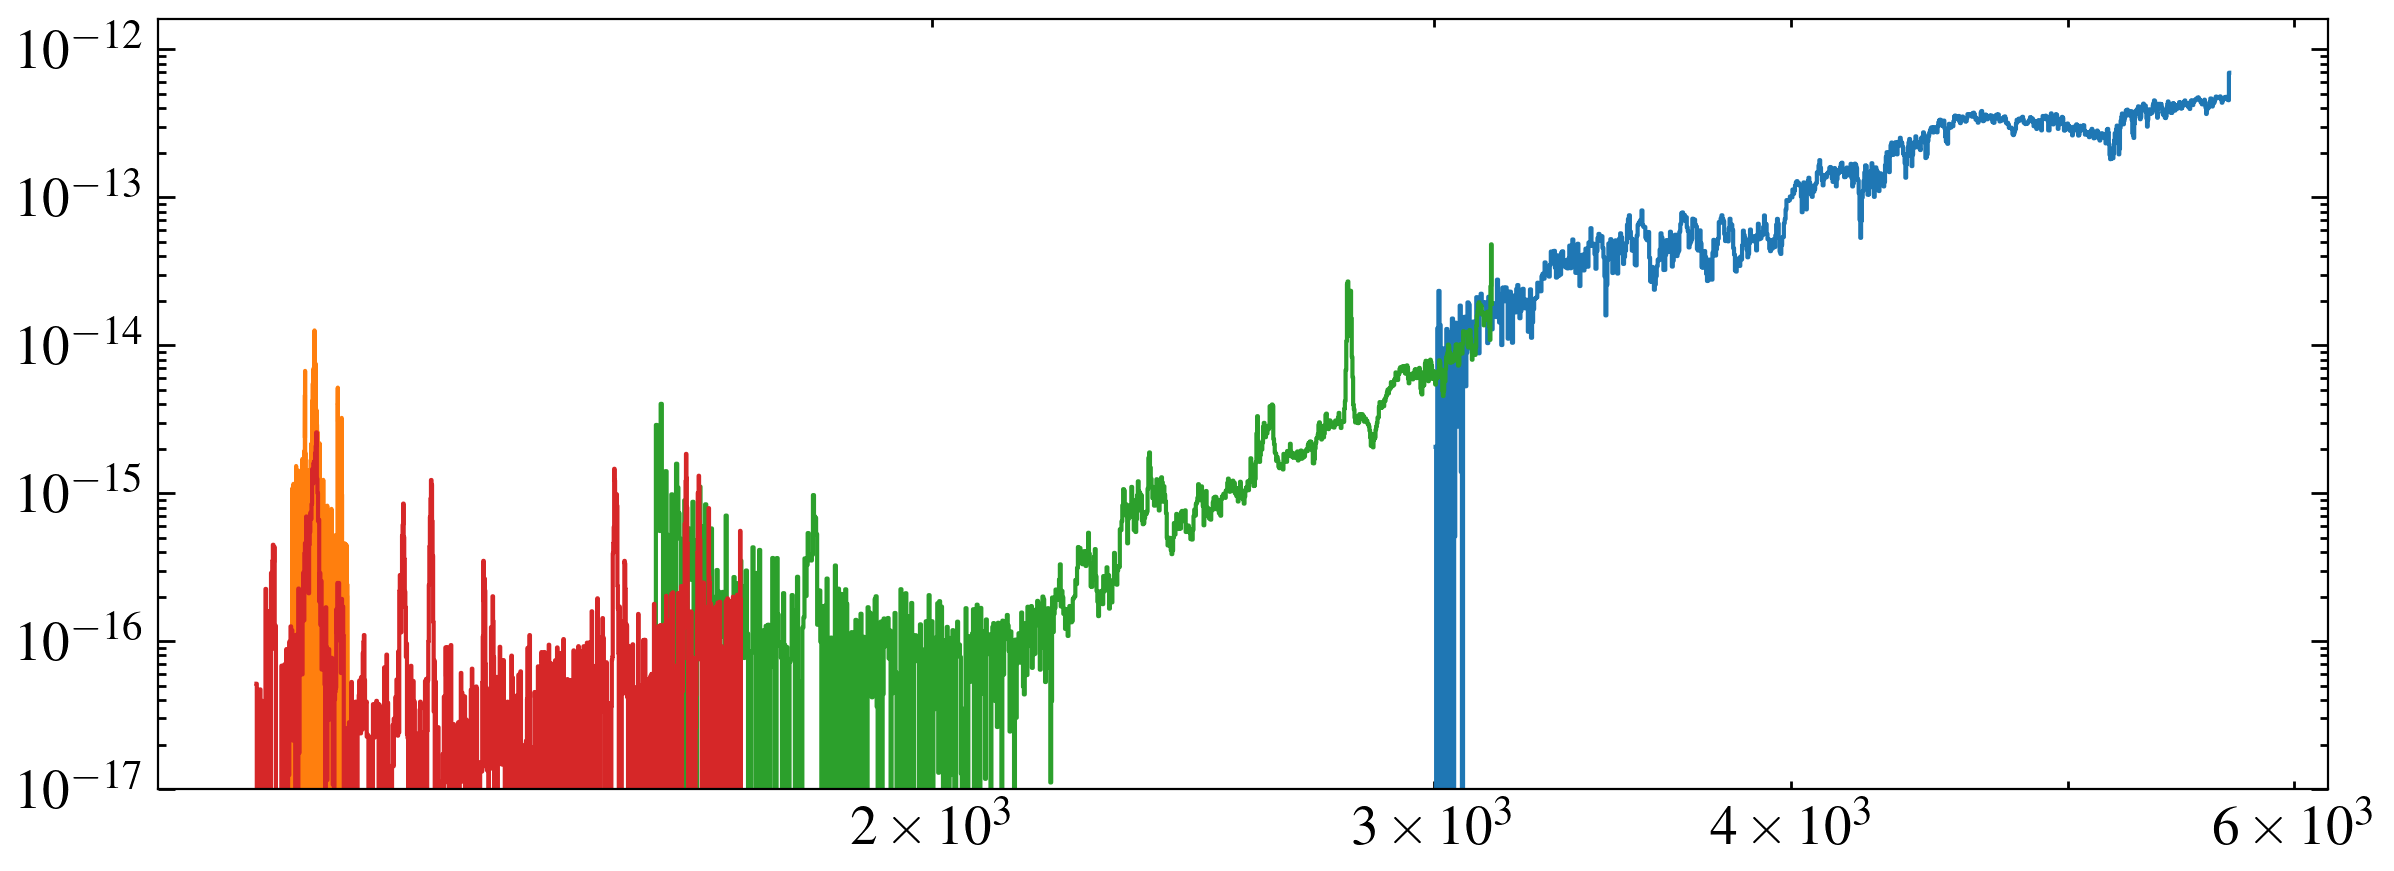

In [5]:
for x in x1ds[::-1]:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating in ['G140L', 'G140M']:
        mask = w > 1160
    elif grating == 'G230L':
        mask = w > 1600
    elif grating =='G430L':
        mask = w > 3000
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid')
    # plt.show()
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-17)
# plt.xlim(1210, 1220)
    

In [6]:
# # fits.getheader(x1ds[2], 1)
# print(fits.getdata(x1ds[2], 1)['EXTRSIZE'])
# print(fits.getdata(x1ds[2], 1)['A2Center'])
# print(fits.getdata(x1ds[2], 1)['BK1OFFST'])


In [7]:
# for x in x1ds[0:2][::-1]:
#     print(x)
#     grating = fits.getheader(x, 0)['OPT_ELEM'] 
#     print(grating)
#     data = fits.getdata(x, 1)[0]
#     print(data['A2Center'])
#     w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
#     if grating in ['G140L', 'G140M']:
#         mask = w > 1160
#     elif grating == 'G230L':
#         mask = w > 1600
#     elif grating =='G430L':
#         mask = w > 3000
#     w, f, e = w[mask], f[mask], e[mask]
#     # plt.step(w, f, where='mid')
#     plt.errorbar(w, f, yerr=e, errorevery=5, drawstyle='steps-mid')
#     # plt.step(w, e, where='mid')
#     # plt.show()
# # plt.yscale('log')
# # plt.xscale('log')
# plt.ylim(-1e-16, 1e-16)
# plt.xlim(1500, 1250)
# plt.axhline(0, c='C2')


In [8]:
import prepare_stis

In [9]:
savepath = 'draft_hlsp/toi-836/'
hlsp = 'meats_hlsp_info.csv'
version = 1
star = 'toi-836'
x1dpath = path
# prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath=savepath, plot=True, save_ecsv=False, save_fits=True, star=star, nclip=5)

In [10]:
import prepare_phoenix_svo as pp



G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)

mass = 0.678
teff = 4552
teff_e = 154
radius = 0.665
distance = 27.51
save_path = 'models/'
star = 'toi-836'
# g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
# print(np.log10(g.value))
g = 4.623
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'logg': g, 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc, 'Teff_e':teff_e}
pw, pf, pe = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=False, make_error=True)
normfac = ((radius*R)/(distance*u.pc.to(u.m)))**2
pdata = Table.read('models/toi-836_phoenix_interpolated.ecsv')
pw, pf, pe =  pdata['WAVELENGTH'], pdata['FLUX'], pdata['ERROR'] 

In [11]:
G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)

mass = 0.678
teff = 4250
teff_e = 120
radius = 0.691
distance = 27.51
save_path = 'models/'
star = 'toi-836_tic'
# g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
# print(np.log10(g.value))
g = 4.475
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'logg': g, 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc, 'Teff_e':teff_e}
pwt, pft, pet = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=False, make_error=True)
normtic = ((radius*R)/(distance*u.pc.to(u.m)))**2
pdata = Table.read('models/toi-836_tic_phoenix_interpolated.ecsv')
pwt, pft, pet =  pdata['WAVELENGTH'], pdata['FLUX'], pdata['ERROR'] 

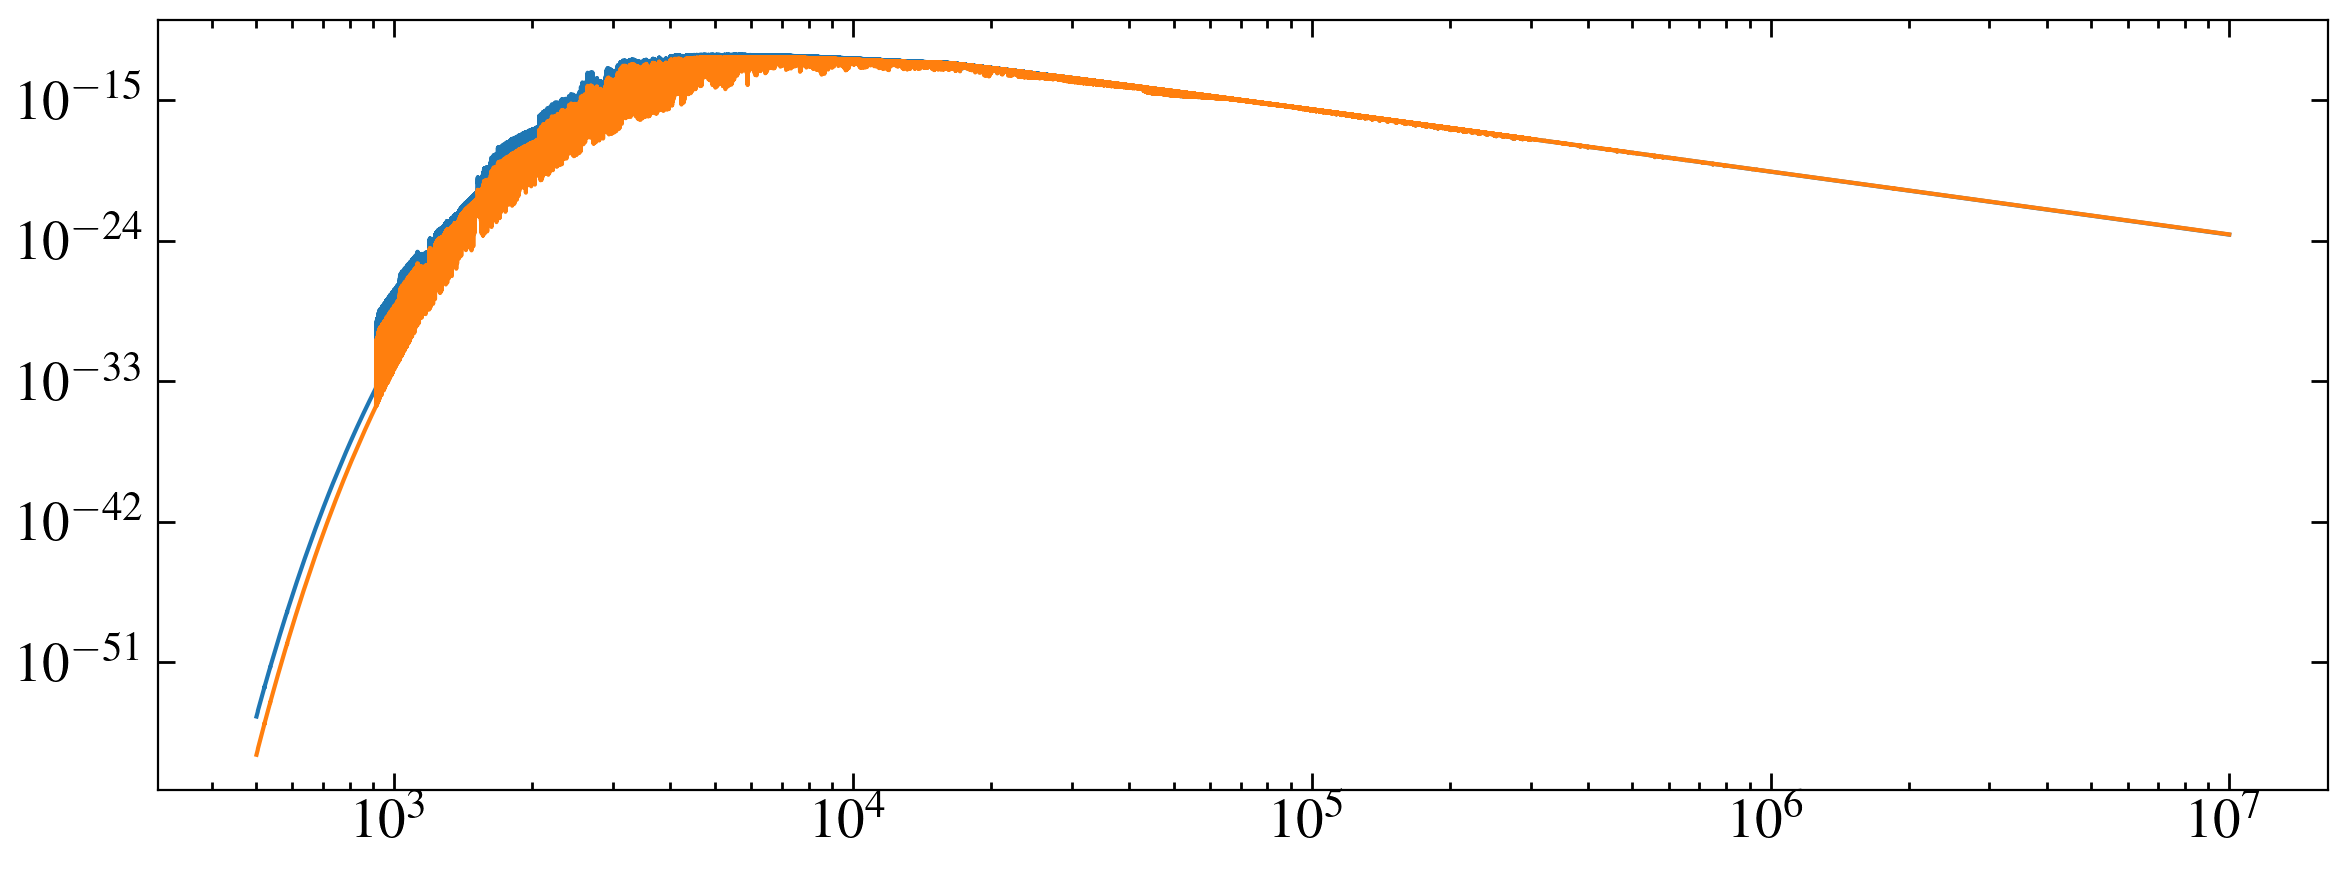

In [12]:
plt.plot(pw, pf*normfac)
plt.plot(pwt, pft*normtic)
plt.yscale('log')
plt.xscale('log')

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17040_sx1.fits
G430L
894.9996
/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17020_x1d.fits
G140M
193.58609
/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17030_x1d.fits
G230L
553.5396
/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17010_x1d.fits
G140L
64.04539


(1000, 10000)

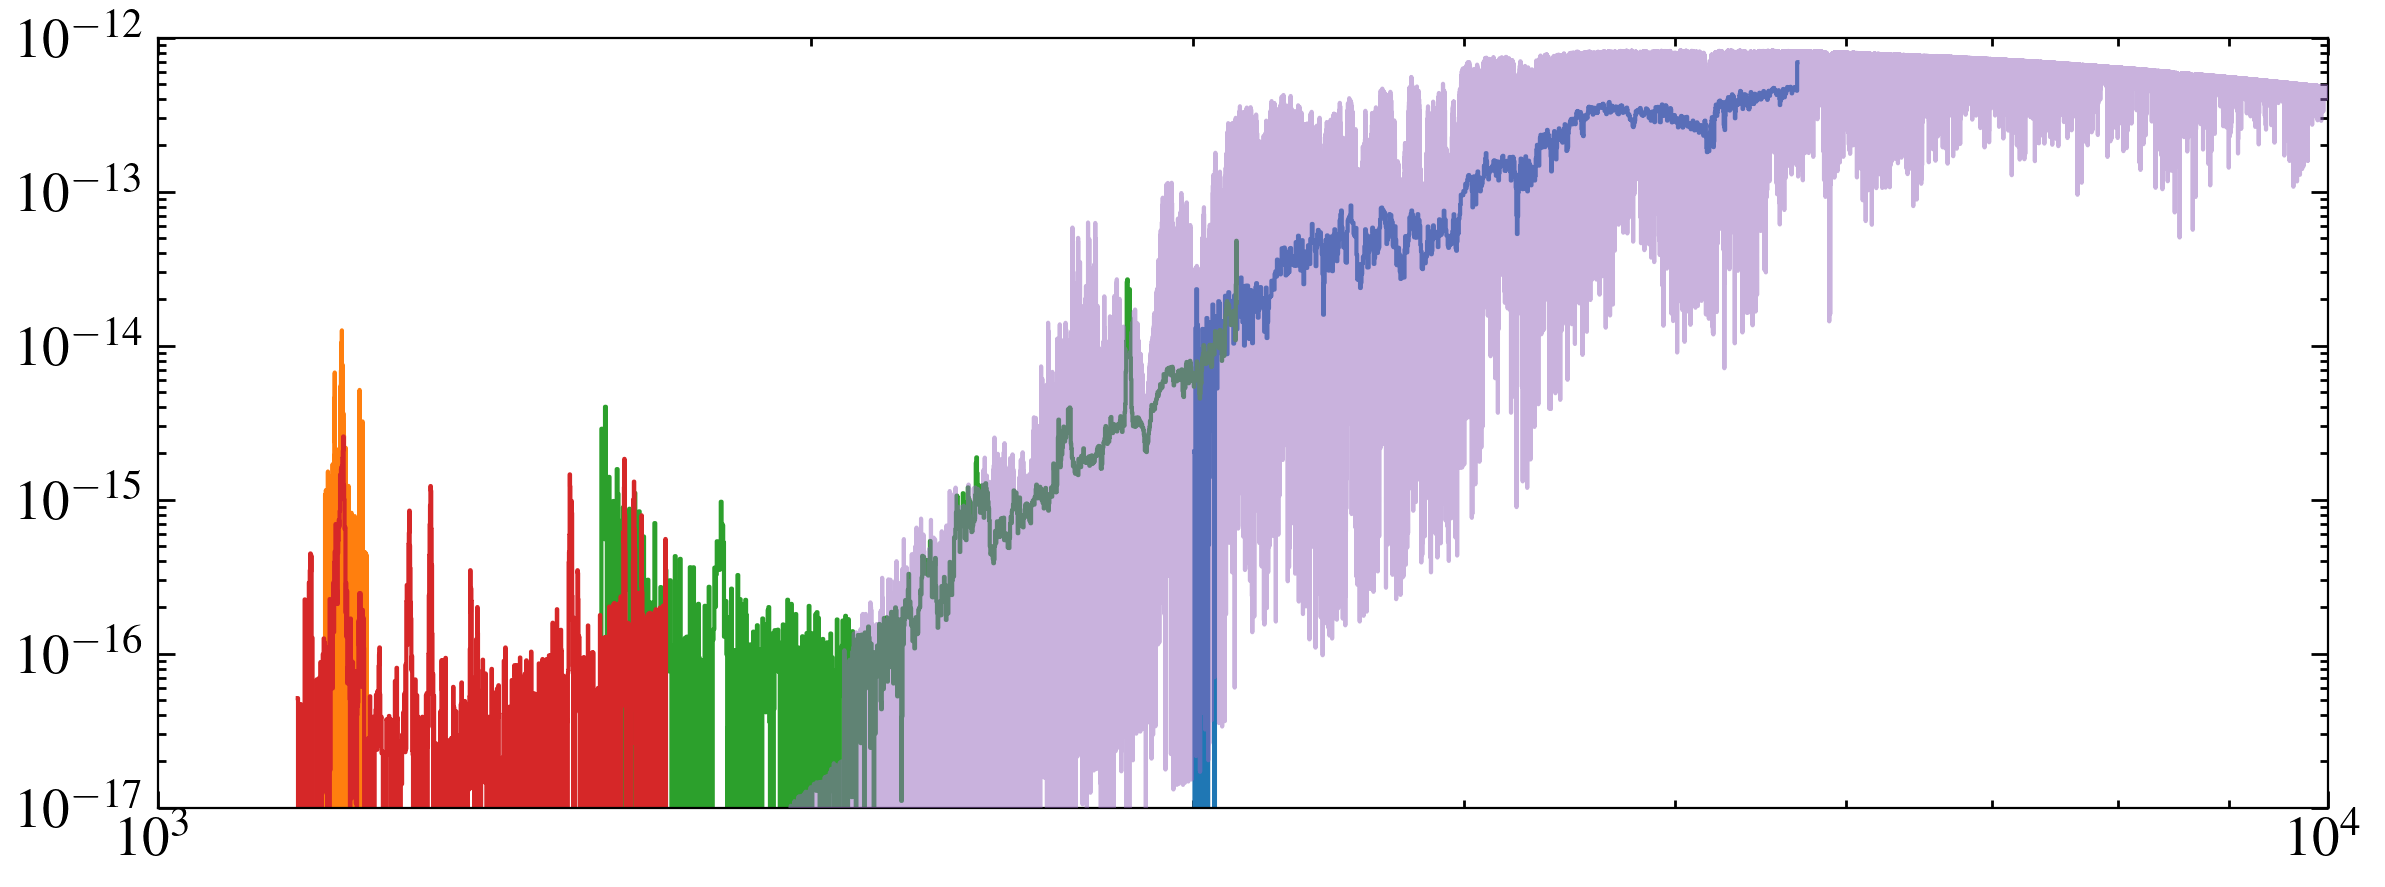

In [13]:
for x in x1ds[::-1]:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating in ['G140L', 'G140M']:
        mask = w > 1160
    elif grating == 'G230L':
        mask = w > 1600
    elif grating =='G430L':
        mask = w > 3000
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid')
    # plt.show()
plt.plot(pw, pf*normfac, alpha=0.5, zorder=10)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-17, 1e-12)
plt.xlim(1000, 10000)
# plt.xlim(1210, 1220)
    

In [51]:
import prepare_model
hdr = fits.getheader('draft_hlsp/toi-836/hlsp_muscles_hst_stis_toi-836_g230l_v1_component-spec.fits', 0)
sed_data = Table(meta=hdr)
prepare_model.make_model_spectrum('models/toi-836_tic_phoenix_interpolated.ecsv', 1, sed_data,
                                  savepath = savepath, save_ecsv=False, save_fits=True, normfac=normfac.value, model_name='PHX')


Spectrum saved as hlsp_muscles_model_phx_toi-836_na_v1_component-spec.fits


In [15]:
hst_hlsp = glob.glob('draft_hlsp/toi-836/*stis*.fits')
hst_hlsp

['draft_hlsp/toi-836/hlsp_muscles_hst_stis_toi-836_g140m_v1_component-spec.fits',
 'draft_hlsp/toi-836/hlsp_muscles_hst_stis_toi-836_g230l_v1_component-spec.fits',
 'draft_hlsp/toi-836/hlsp_muscles_hst_stis_toi-836_g430l_v1_component-spec.fits',
 'draft_hlsp/toi-836/hlsp_muscles_hst_stis_toi-836_g140l_v1_component-spec.fits']

In [16]:
# from dust_extinction.parameter_averages import F99
# ext = F99(Rv=3.1)


ImportError: cannot import name 'tarfile' from 'backports' (/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/backports/__init__.py)

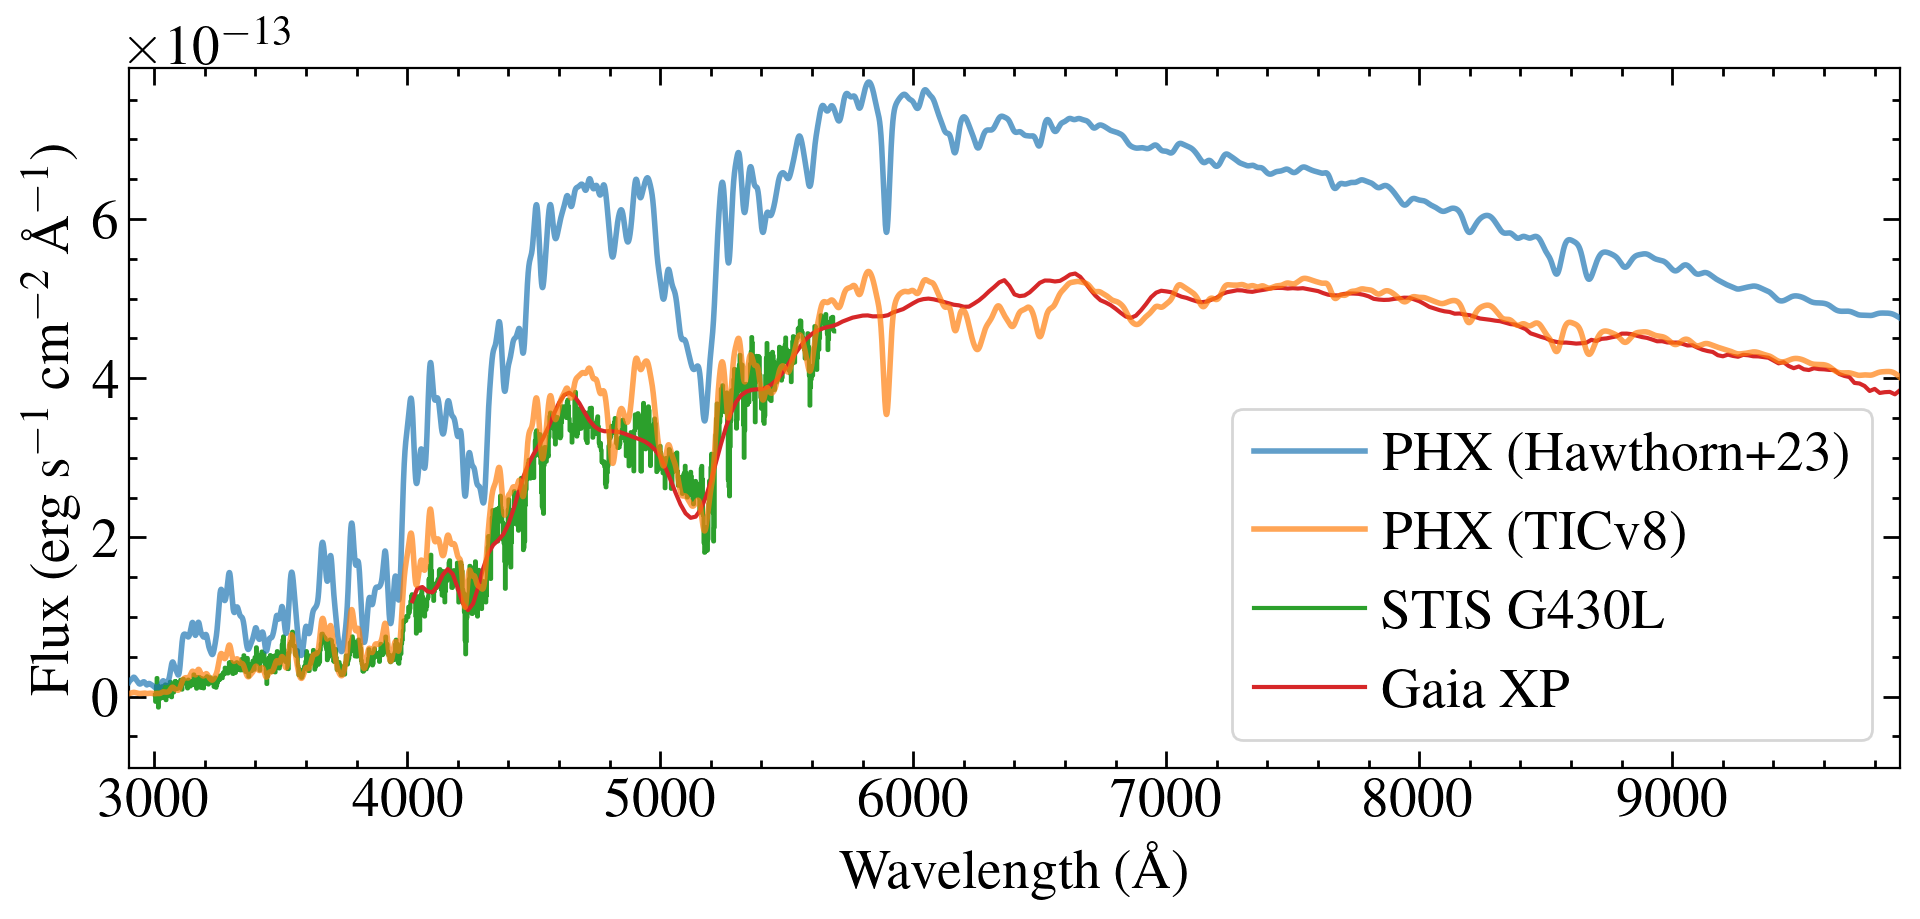

In [17]:
pmask = (pw > 2000) & (pw < 10200)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 500)


pmask = (pw > 2000) & (pw < 10200)
pwti, pfti = pwt[pmask], pft[pmask]*normtic
pwti, pfti = pp.smear(pwti, pfti, 500)


fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(pwi, pfi, alpha=0.7, lw=2, label='PHX (Hawthorn+23)', zorder=20)
ax.plot(pwti, pfti, alpha=0.7, lw=2, label='PHX (TICv8)', zorder=20)
phxscale = 0.5
# ax.plot(pwi, pfi*phxscale, alpha=0.5, label = r'PHX*{}'.format(phxscale))

data = fits.getdata(hst_hlsp[2], 1)
ow, of, oe = data['WAVELENGTH'], data['FLUX'], data['ERROR']
mask = (ow > 3000) & (ow < 5690)
ow, of, oe = ow[mask], of[mask], oe[mask]
ax.step(ow, of, where='mid', label = 'STIS G430L')

# avguess=0.5
# redopt = ext.extinguish(ow*u.AA, Av=avguess) #just some guesses for extinction
# ax.step(ow, of/redopt, where='mid', label = 'STIS G430L (Av = {})'.format(avguess))



ax.set_xlim(2900, 9900)
ax.set_ylim(-0.9e-13, 7.9e-13)

# #sdss u
# ax.scatter(3520, 5.62e-14, edgecolor='k', zorder=10, c='C0', label = 'SDSS')
# #sdss g
# ax.scatter(4820, 2.79e-13, edgecolor='k', zorder=10, c='C0')
# #sdss r
# ax.scatter(6250, 4.9e-13, edgecolor='k', zorder=10, c='C0')
# #sdss i
# ax.scatter(7630, 4.96e-13, edgecolor='k', zorder=10, c='C0')
# #sdss z
# ax.scatter(9020, 3.83e-13, edgecolor='k', zorder=10, c='C0')


#gaia

gaia = Table.read('misc_data/toi-836_gaia/gaiadr3_sampled_mean_spectra_6230733559097425152.vot')
mask = gaia['type'] == 'XP'
gw, gf = gaia['wavelength'][mask]*10, gaia['flux'][mask]*(u.W/u.m**2/u.nm).to(u.erg/u.s/u.cm**2/u.AA)
mask = (gw > 4000) #& (gw < 1000)
gw, gf = gw[mask], gf[mask]

ax.plot(gw, gf, label ='Gaia XP')
# redgaia = ext.extinguish(gw*u.AA, Av=avguess) #
# ax.plot(gw, gf/redgaia, label ='Gaia XP (Av = {})'.format(avguess))




ax.legend(frameon=True, loc=4)


ax.set_xlabel('Wavelength (\AA)')
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

fig.tight_layout()
fig.savefig('plots/toi-836_opt.pdf')

Uh oh. SDSS agrees with HST, model is wrong.

In [18]:
(5.62e-10*u.erg/u.s/u.cm**2/u.um).to(u.erg/u.s/u.cm**2/u.um)

<Quantity 5.62e-10 erg / (s um cm2)>

In [19]:
1000/36.35

27.51031636863824

In [20]:
gw[-1]

10200.0

lya is weird

In [21]:
g140m = x1ds[2]

(1214.0, 1217.0)

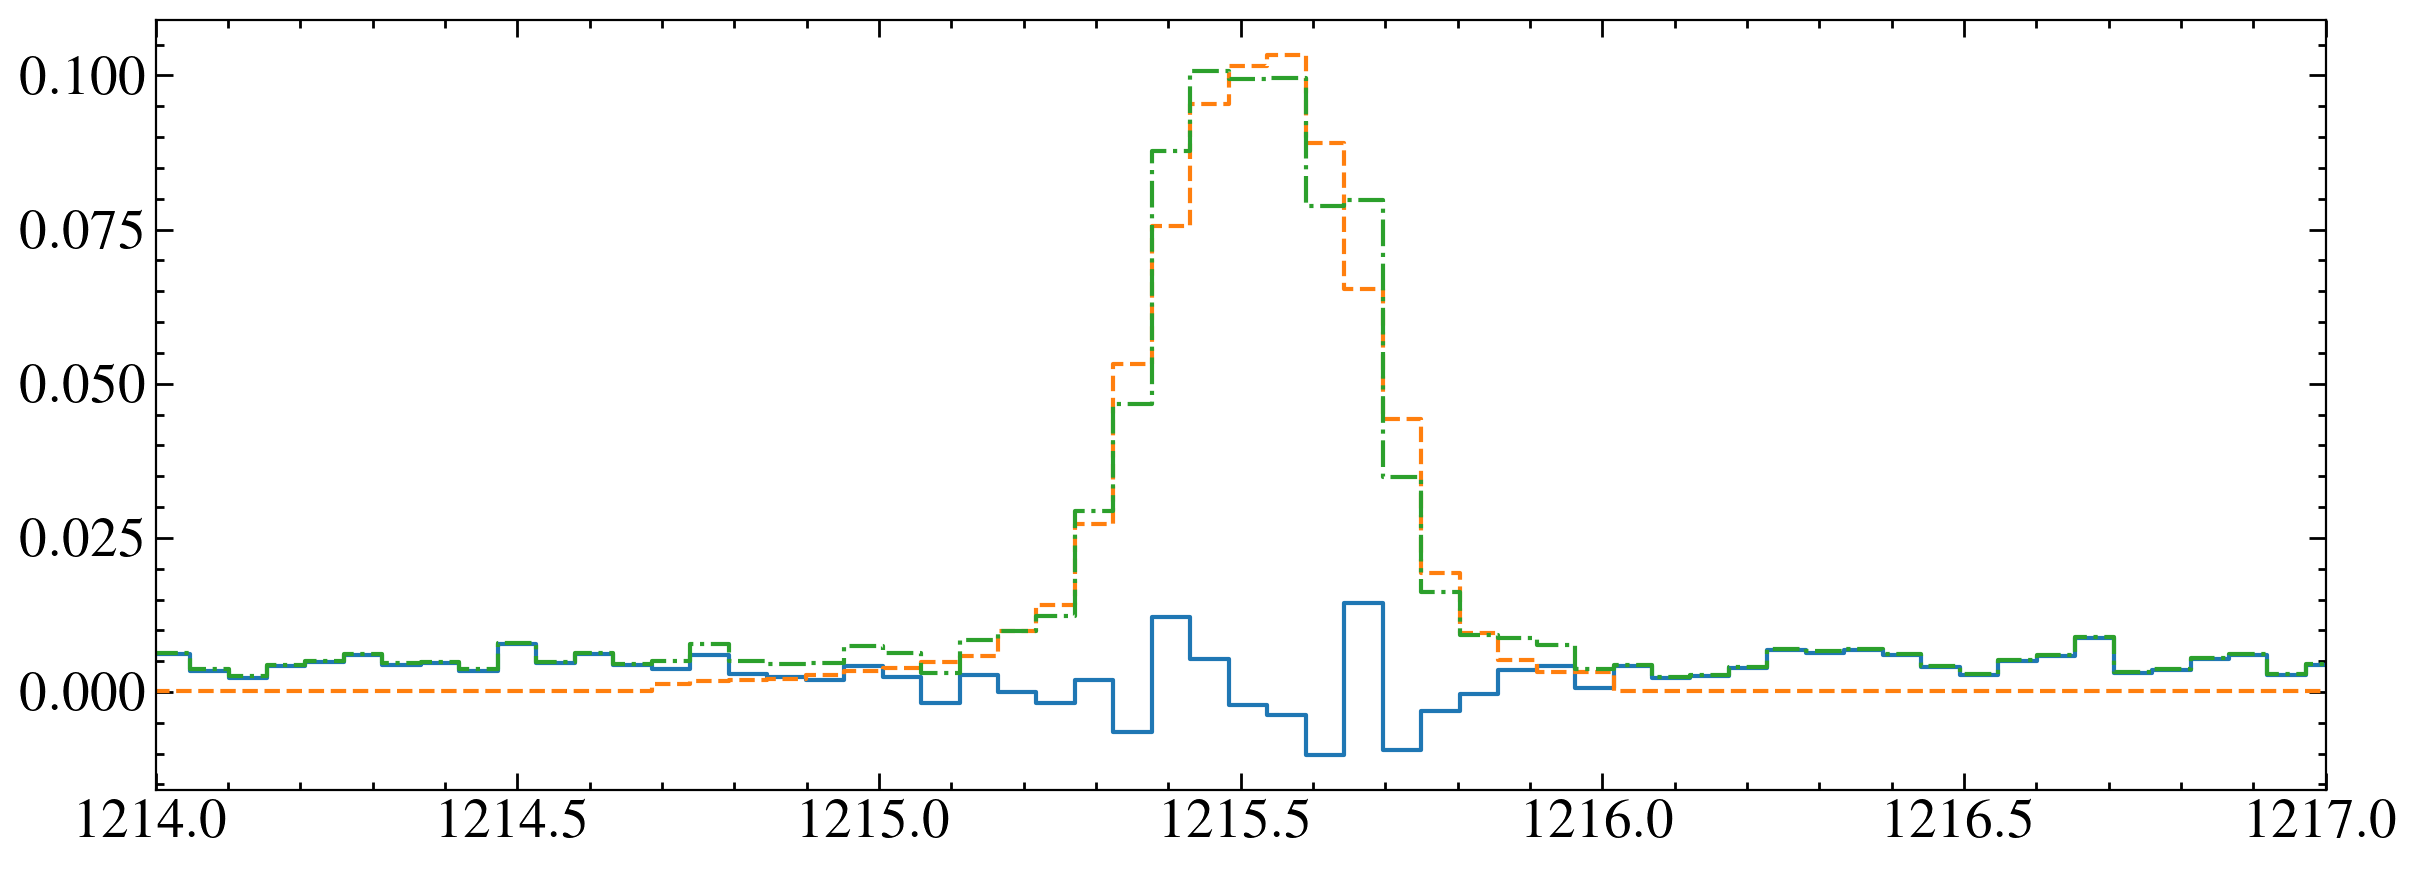

In [22]:
fig, ax = plt.subplots()

data = fits.getdata(g140m, 1)[0]
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

# ax.plot(w, f)
ax.step(w, data['NET'], where='mid',)
ax.step(w, data['BACKGROUND'], where='mid', ls='--')
ax.step(w, data['GROSS'], where='mid', ls='-.')

ax.set_xlim(1214, 1217)

# ax2 = ax.twinx()
# ax2.plot(w, data['DQ'], c='C5', ls='--')
# ax2.set_ylim(-1, 10)

(1210.0, 1220.0)

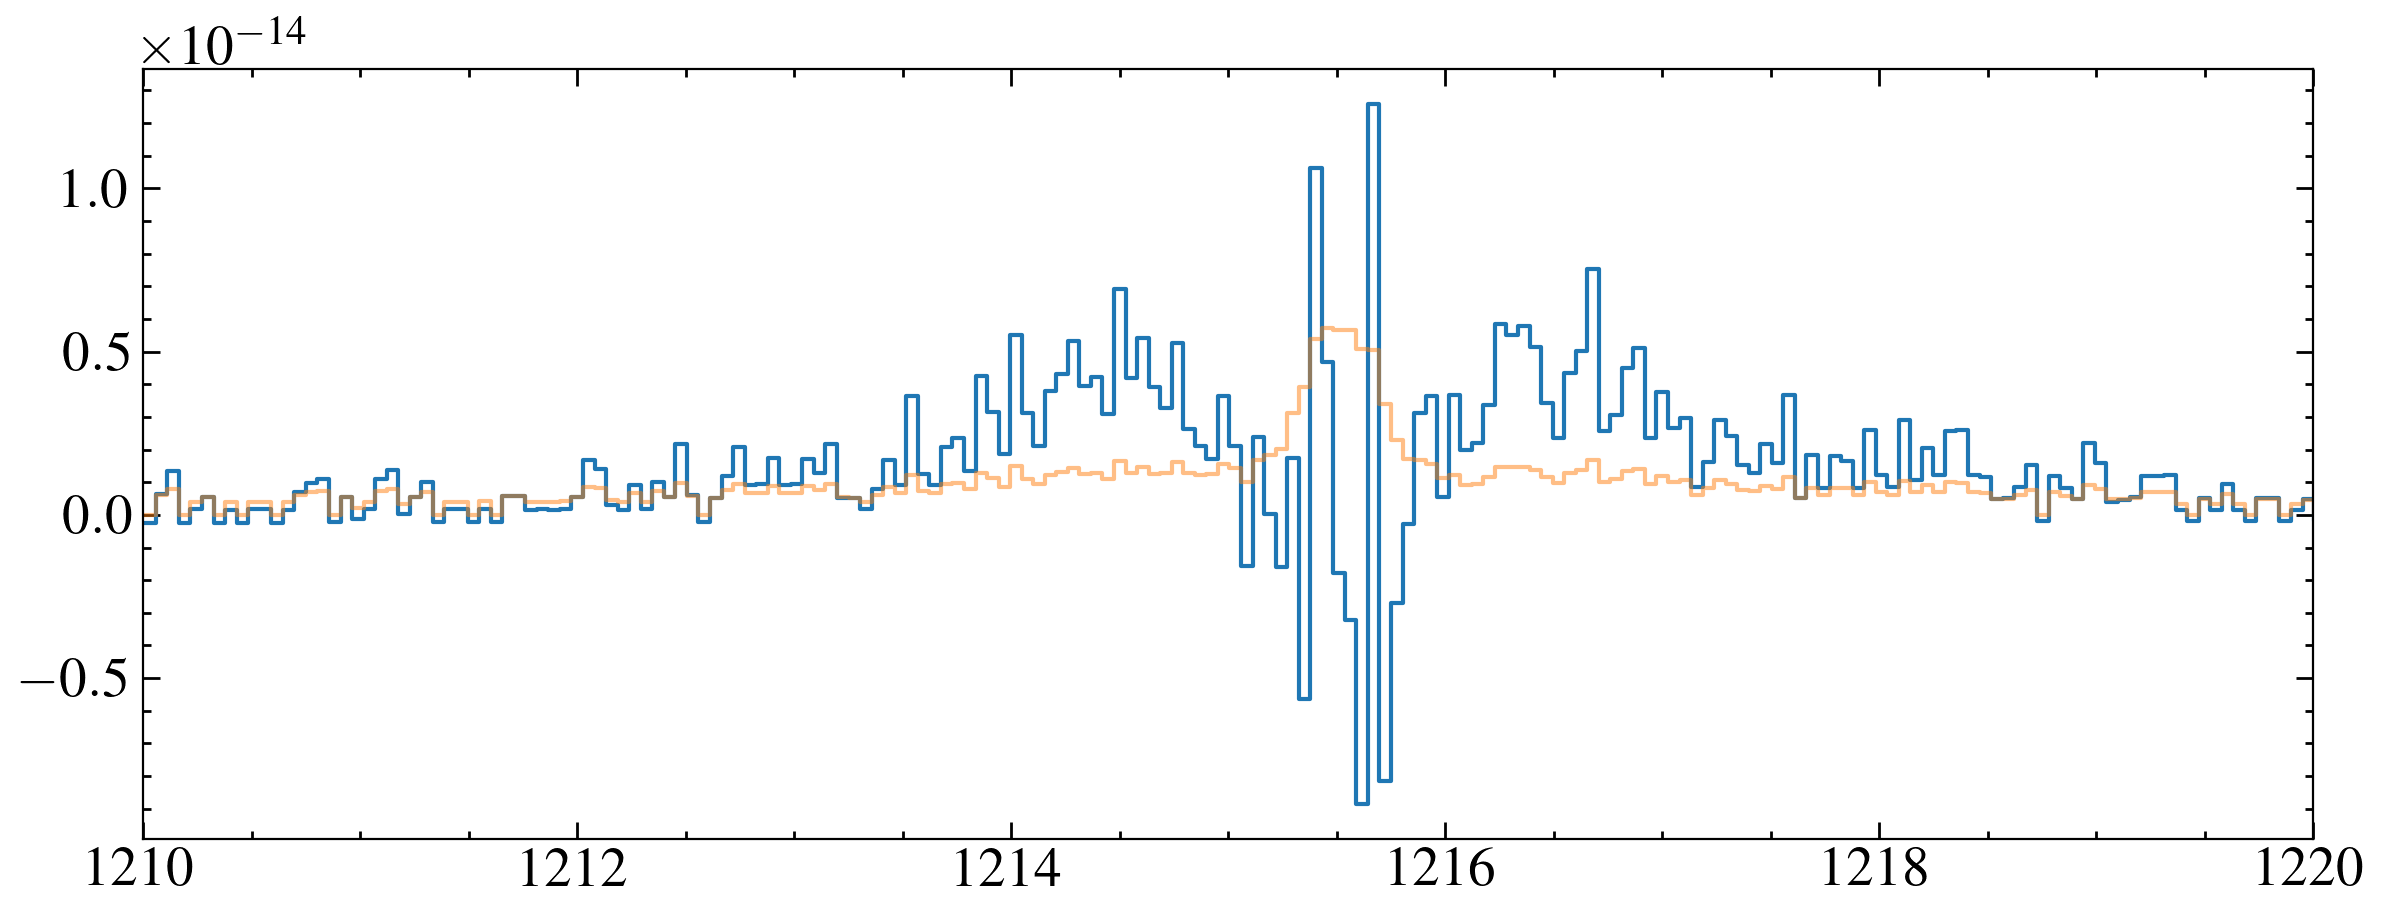

In [23]:
fig, ax = plt.subplots()

data = fits.getdata(g140m, 1)[0]
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

ax.step(w, f, where='mid')
ax.step(w, e, where='mid', alpha=0.5)
# ax.step(w, data['NET'], where='mid',)
# ax.step(w, data['BACKGROUND'], where='mid', ls='--')
# ax.step(w, data['GROSS'], where='mid', ls='-.')

ax.set_xlim(1210, 1220)

# ax2 = ax.twinx()
# ax2.plot(w, data['DQ'], c='C5', ls='--')
# ax2.set_ylim(-1, 10)

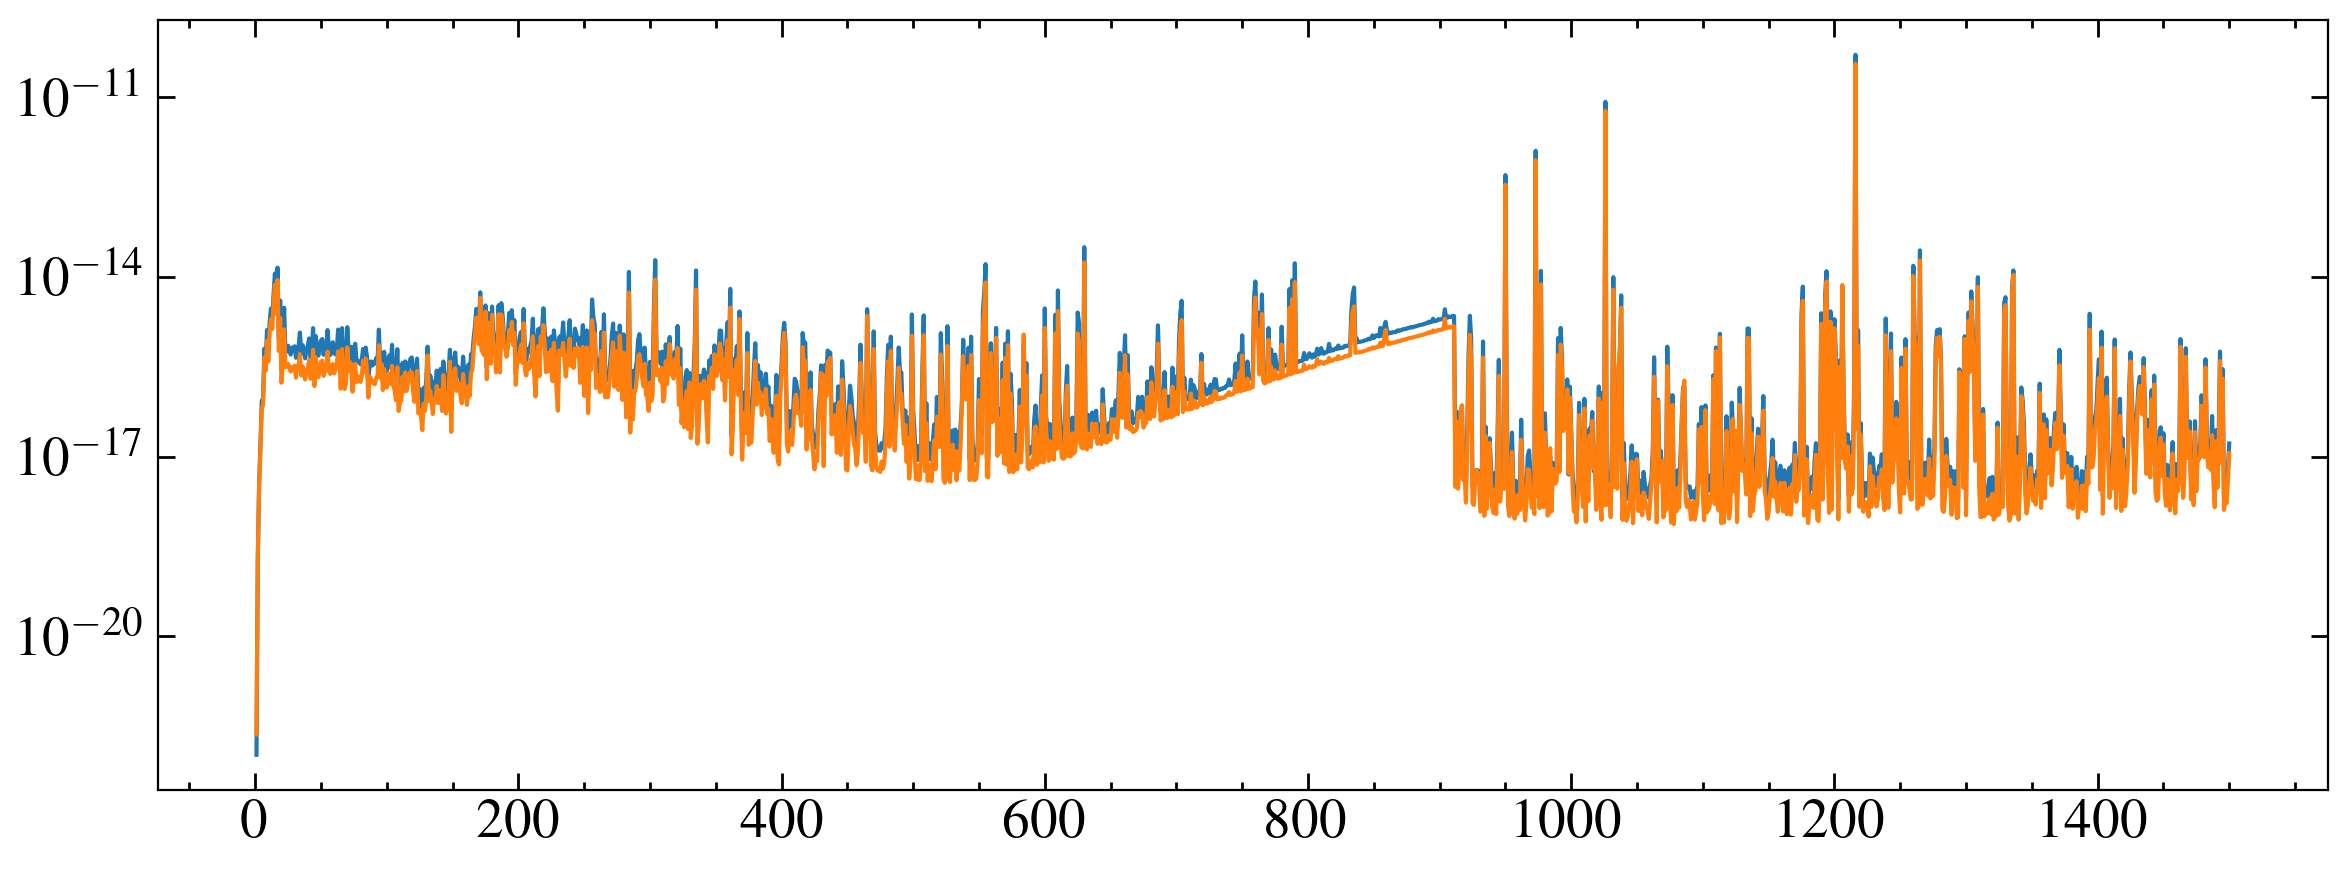

In [24]:
#dem
dempath = '/media/david/2tb_ext_hd/hddata/meats/dems/toi-836/spectrum_toi-836_p17.fits'
dem = fits.getdata(dempath, 1)

dw, df= dem['Wavelength'], dem['Flux_density']
eu, el = dem['Upper_Error_84'], dem['Lower_Error_16']


mean_e = np.mean([eu, el], axis=0)
# plt.plot(dw, mean_e)
# plt.yscale('log')

log_mean_e = (eu - el) / (np.log(eu)- np.log(el))

plt.plot(dw, df)
plt.plot(dw, log_mean_e)
# plt.plot(dw, mean_e)

plt.yscale('log')

demtab = Table([dw, df, log_mean_e], names=['WAVELENGTH', 'FLUX', 'ERROR'])
demtab.write('models/toi-836_dem.ecsv', overwrite=True)



In [25]:
hdr = fits.getheader('draft_hlsp/toi-836/hlsp_muscles_hst_stis_toi-836_g140l_v1_component-spec.fits', 0)
sed_data = Table(meta=hdr)

In [26]:
# #dem

prepare_model.make_model_spectrum('models/toi-836_dem.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1, model_name='dem')

Spectrum saved as hlsp_muscles_model_dem_toi-836_na_v1_component-spec.fits


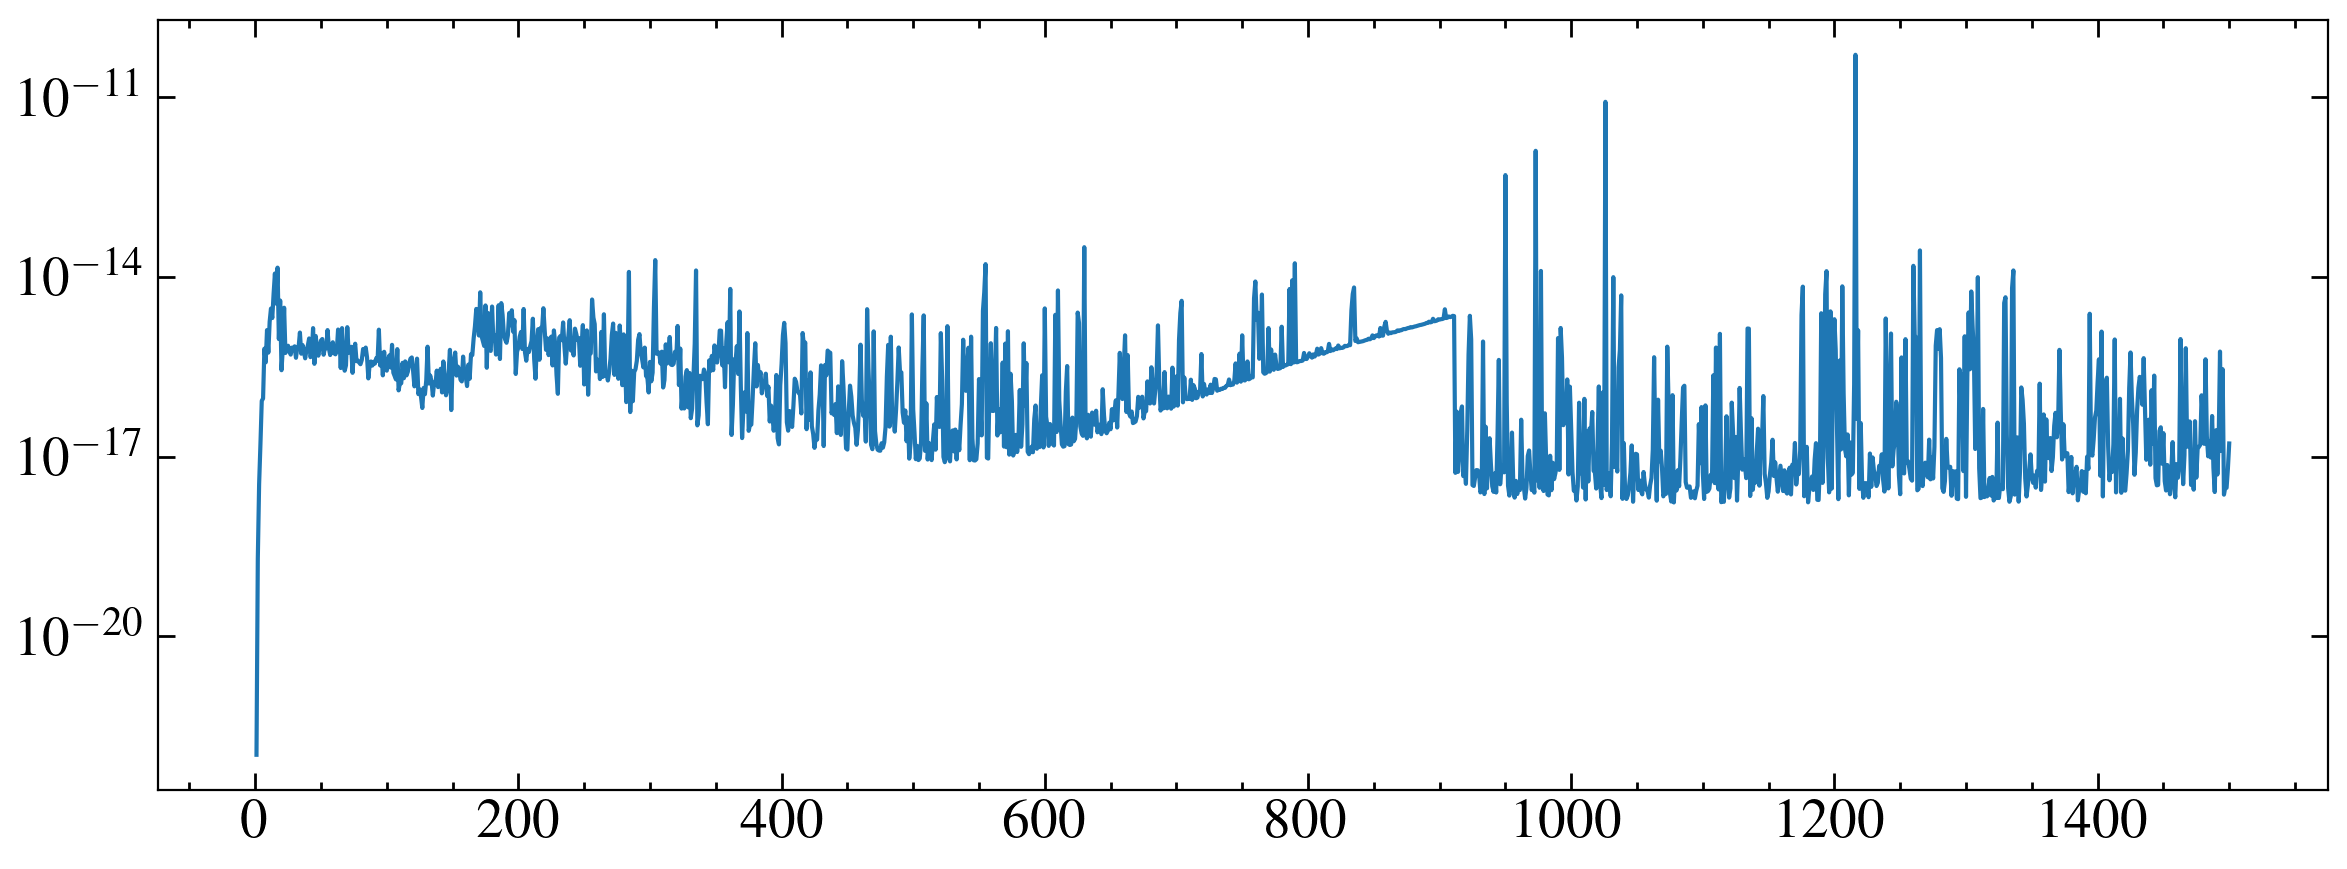

In [27]:
data = fits.getdata('draft_hlsp/toi-836/hlsp_muscles_model_dem_toi-836_na_v1_component-spec.fits', 1)
plt.plot(data['WAVELENGTH'], data['FLUX'])
plt.yscale('log')


In [28]:
#xray
import prepare_xmm

In [29]:
xpath = '/media/david/2tb_ext_hd/hddata/meats/xmm/toi-836/TOI-863.fits'

# xfits = fits.open(xpath)
# hdr = xfits[0].header
# hdr

In [30]:
# hdr.append(('mos1_FILTER', 'Medium'))
# hdr.append(('mos2_FILTER', 'Medium'))
# hdr.append(('pn_FILTER', 'Medium'))
# hdr.append(('pn_DURATION', 30500))
# hdr.append(('pn_DATE-OBS', '2022-07-25 14:14:21'))
# hdr.append(('pn_DATE-END','2022-07-25 22:42:41' ))
# hdr.append(('OBS_ID', '0892000601'))
# hdr['TARGET'] = 'TOI-836'
# hdr

In [31]:
# xfits.writeto('/media/david/2tb_ext_hd/hddata/meats/xmm/toi-836/toi-836_djw.fits', overwrite=True)

In [32]:
xmm_path = '/media/david/2tb_ext_hd/hddata/meats/xmm/toi-836/toi-836_djw.fits'

hlsp = dict(Table.read('meats_hlsp_info.csv'))
# hlsp = np.genfromtxt('meats_hlsp_info.csv', delimiter=',', dtype=None, names=True)
# xmm_path = xpath
version = 1

prepare_xmm.make_xmm_spectra(xmm_path, savepath, version, hlsp, apec_repo='models/', make_apec=True, save_ecsv=False, save_fits=True)

Spectrum saved as hlsp_muscles_xmm_epic_toi-836_na_v1_component-spec.fits


Spectrum saved as hlsp_muscles_model_apec_toi-836_na_v1_component-spec.fits


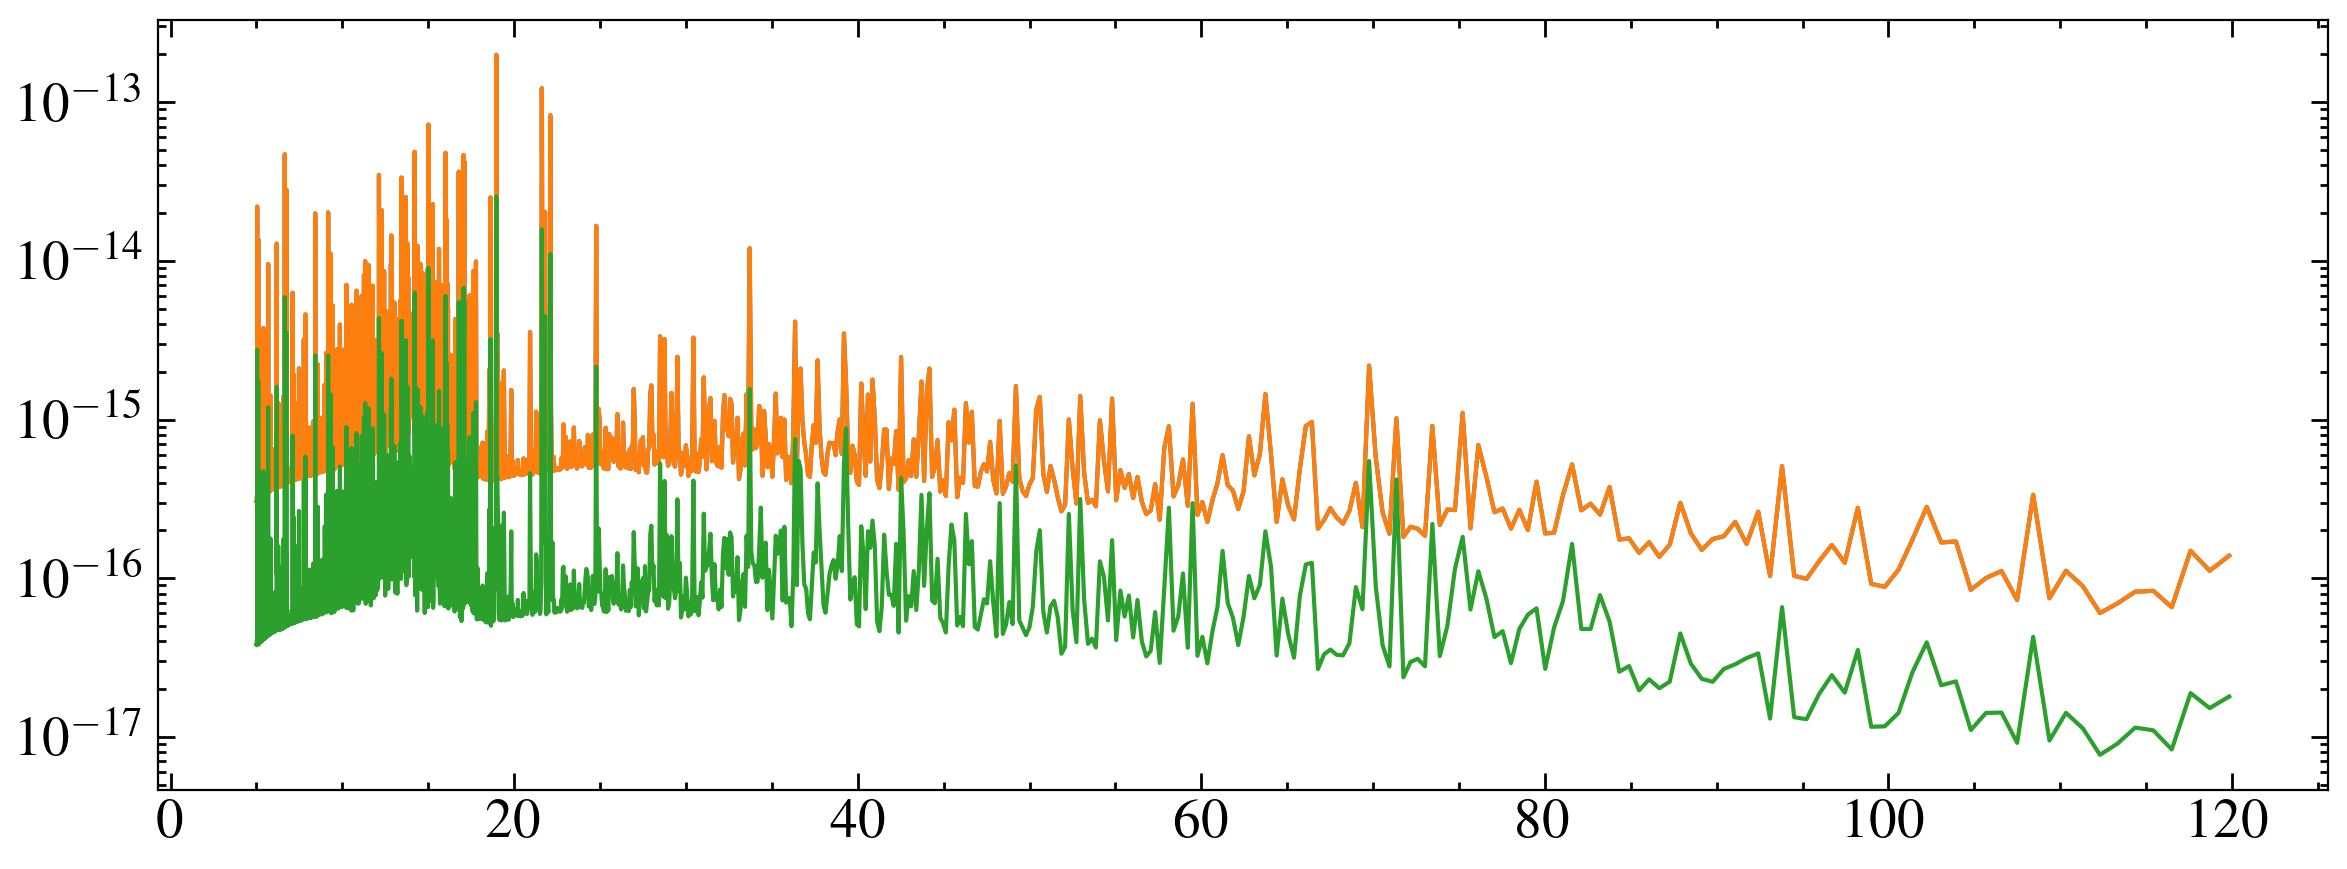

In [33]:
xray = Table.read('models/TOI-836apec.txt', format='ascii.basic')
plt.plot(xray['WAVELENGTH'], xray['FLUX'])
plt.yscale('log')

xray = Table.read('models/TOI-836_apec_errs.ecsv')
plt.plot(xray['WAVELENGTH'], xray['FLUX'])
plt.plot(xray['WAVELENGTH'], xray['ERROR'])
prepare_model.make_model_spectrum('models/TOI-836_apec_errs.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1.0, model_name='apec')


In [34]:
print((7.8*u.MK).to(u.keV,equivalencies=u.temperature_energy()) )

0.6721519944473239 keV


Making a comparison for MW

In [35]:
hlsp = glob.glob('draft_hlsp/toi-836/*fits')
hlsp

['draft_hlsp/toi-836/hlsp_muscles_model_phx_toi-836_na_v1_component-spec.fits',
 'draft_hlsp/toi-836/hlsp_muscles_hst_stis_toi-836_g140m_v1_component-spec.fits',
 'draft_hlsp/toi-836/hlsp_muscles_hst_stis_toi-836_g230l_v1_component-spec.fits',
 'draft_hlsp/toi-836/hlsp_muscles_model_dem_toi-836_na_v1_component-spec.fits',
 'draft_hlsp/toi-836/hlsp_muscles_xmm_epic_toi-836_na_v1_component-spec.fits',
 'draft_hlsp/toi-836/hlsp_muscles_hst_stis_toi-836_g430l_v1_component-spec.fits',
 'draft_hlsp/toi-836/hlsp_muscles_model_apec_toi-836_na_v1_component-spec.fits',
 'draft_hlsp/toi-836/hlsp_muscles_hst_stis_toi-836_g140l_v1_component-spec.fits']

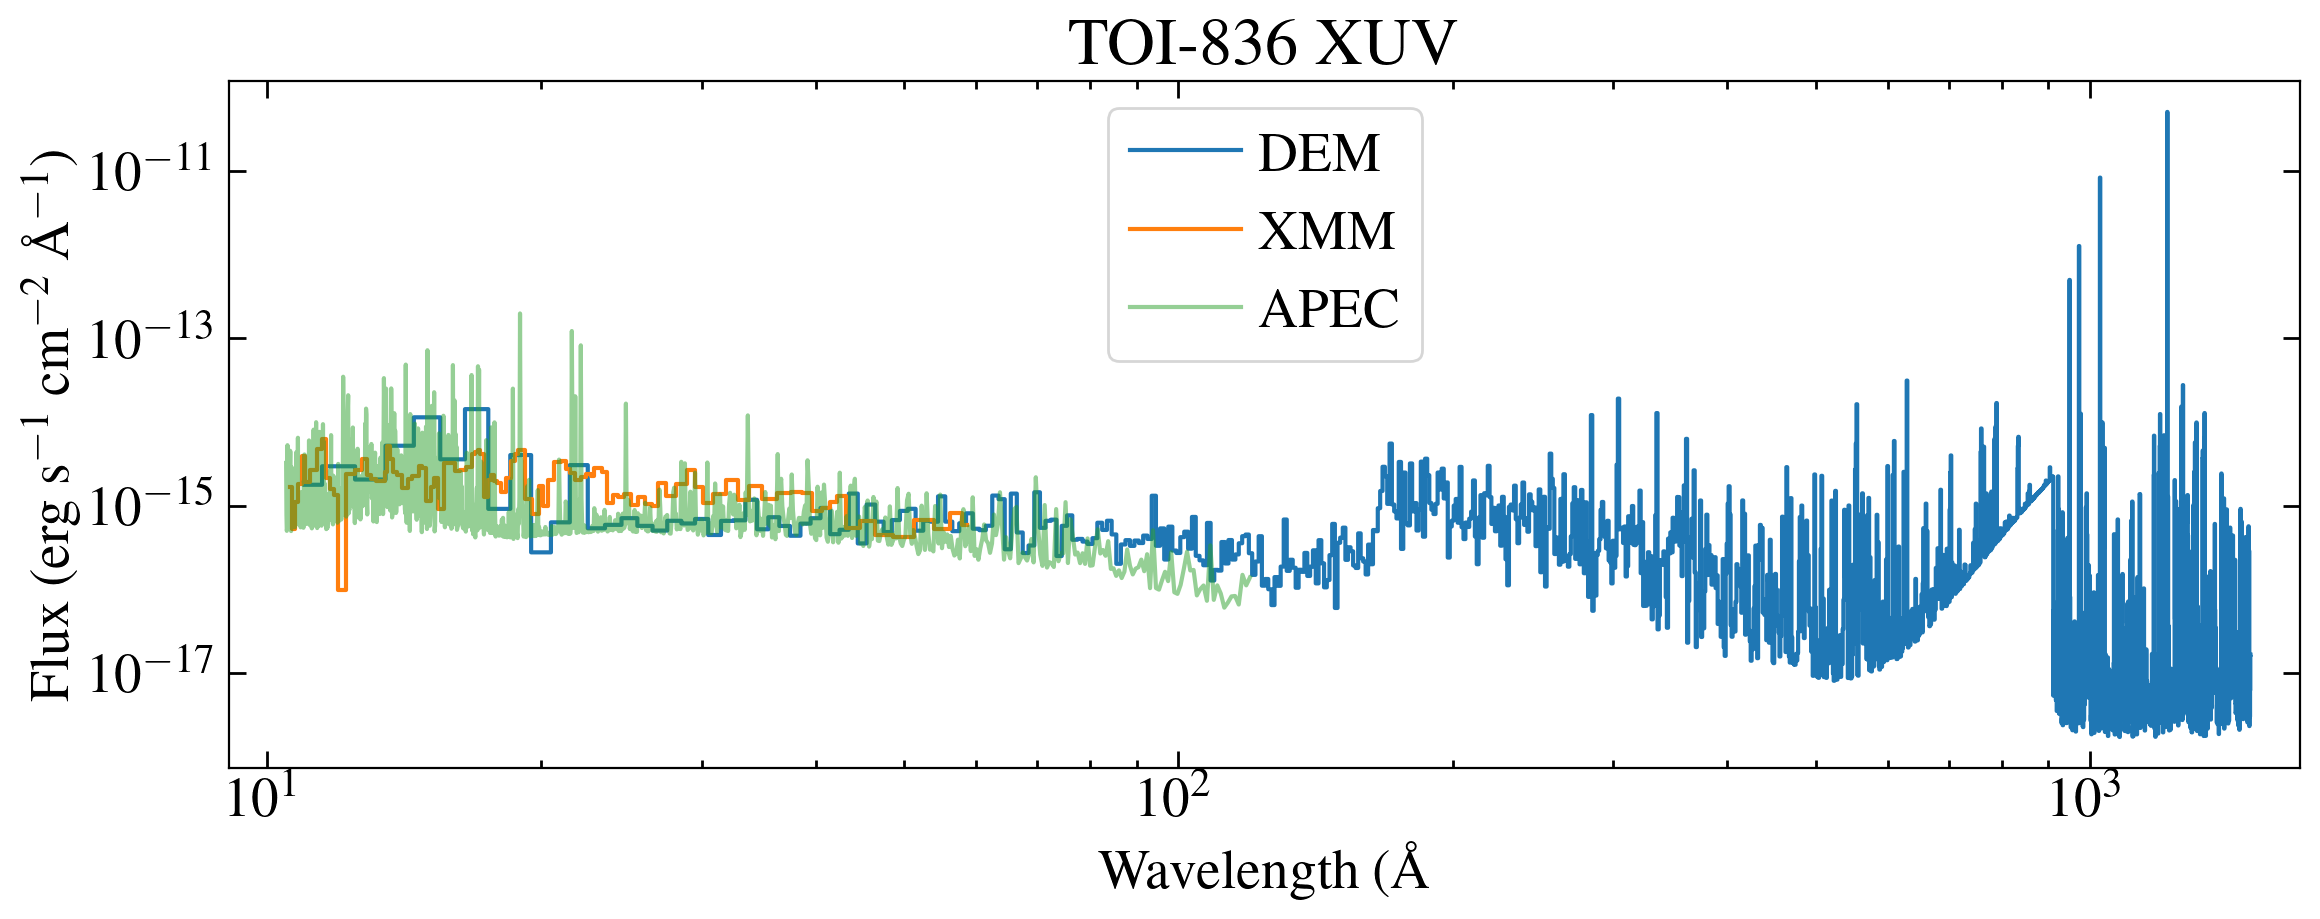

In [36]:
fig, ax = plt.subplots(figsize=(12, 5))

data = fits.getdata(hlsp[3], 1)
dmask = data['WAVELENGTH'] > 10
ax.step(data['WAVELENGTH'][dmask], data['FLUX'][dmask], where='mid', label ='DEM')

data = fits.getdata(hlsp[4])
xmask = data['WAVELENGTH'] >10.5
# ax.errorbar(data['WAVELENGTH'][xmask], data['FLUX'][xmask], yerr= data['ERROR'][xmask])
ax.step(data['WAVELENGTH'][xmask], data['FLUX'][xmask], where='mid', label='XMM')

data = fits.getdata(hlsp[6])
amask = data['WAVELENGTH'] >10.5
# ax.errorbar(data['WAVELENGTH'][xmask], data['FLUX'][xmask], yerr= data['ERROR'][xmask])
ax.plot(data['WAVELENGTH'][amask], data['FLUX'][amask], alpha=0.5, label='APEC')


ax.set_yscale('log')
ax.set_xscale('log')

ax.legend(frameon=True)

ax.set_xlabel('Wavelength (\AA')
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

ax.set_title('TOI-836 XUV')
ax.set_xlim(9.1, 1700)


fig.tight_layout()

fig.savefig('plots/toi-836_xuv.pdf')


<ErrorbarContainer object of 3 artists>

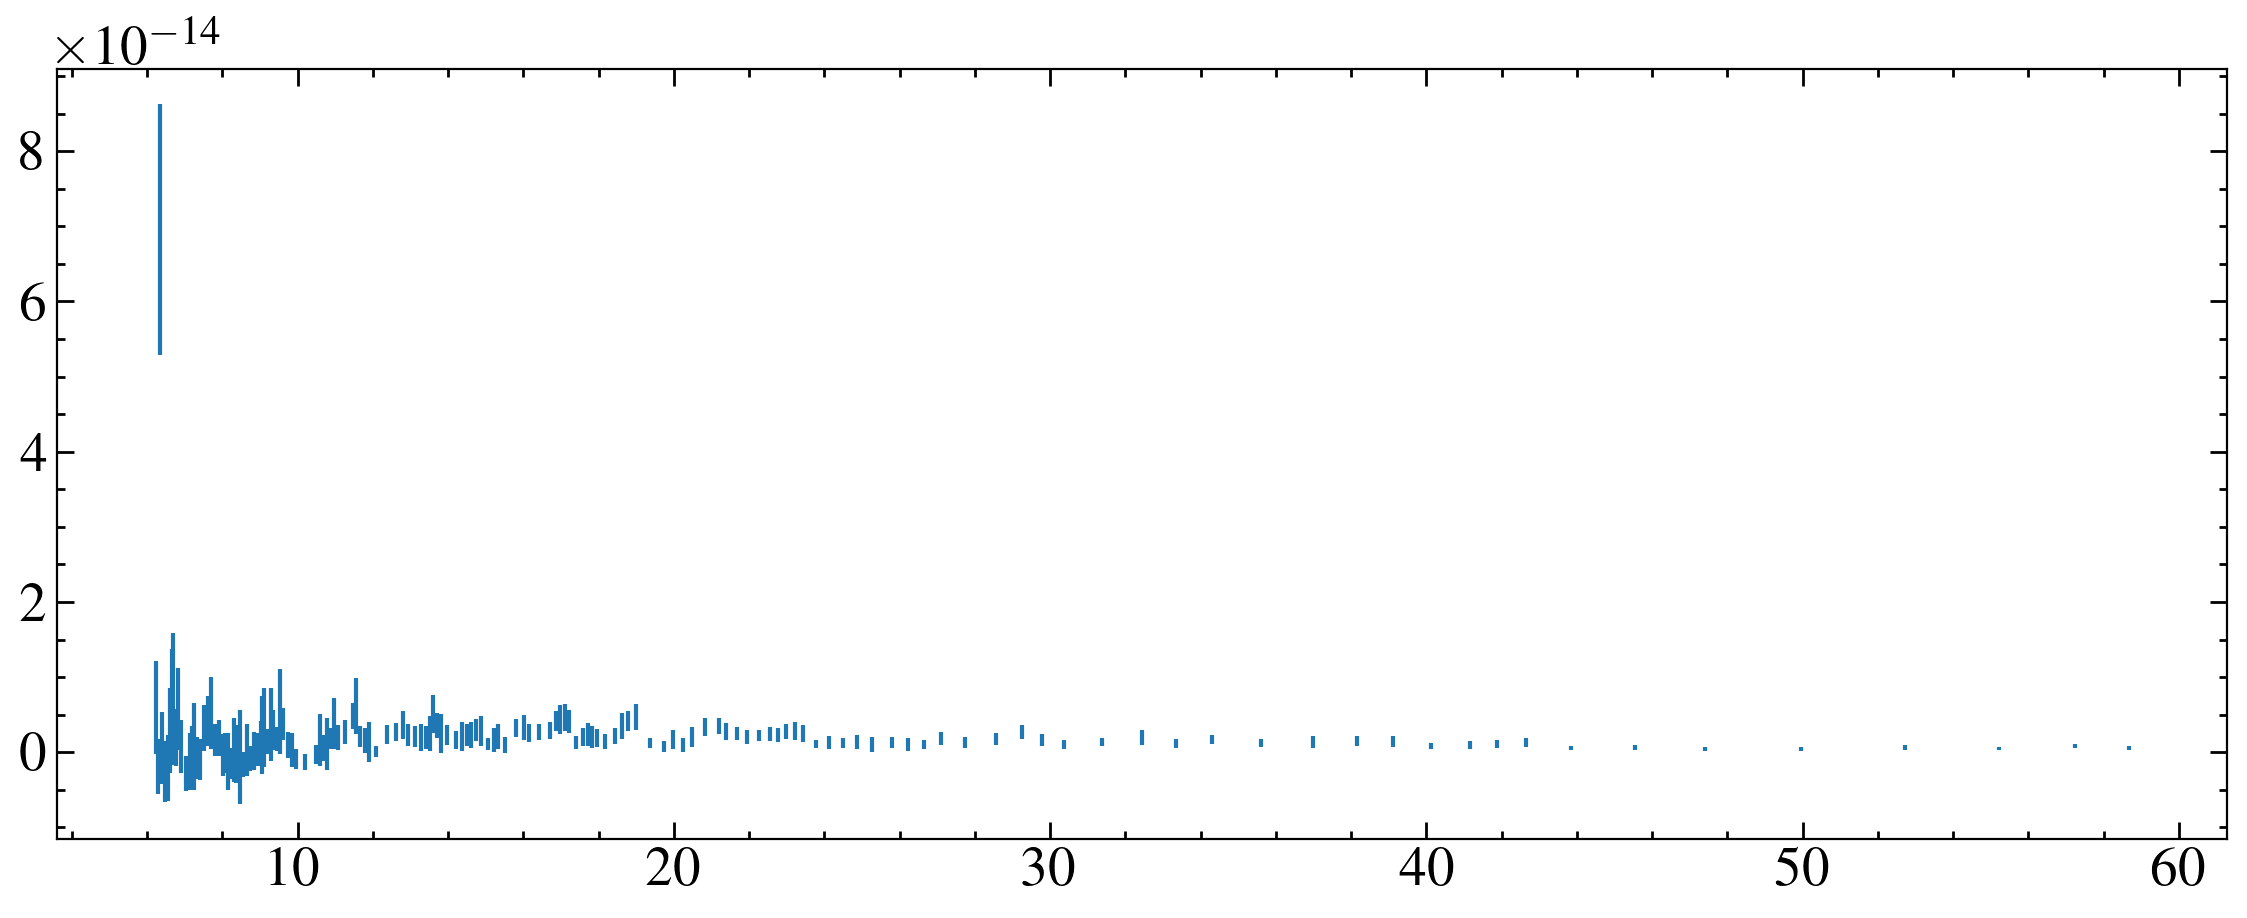

In [37]:
fig, ax = plt.subplots()
data = fits.getdata(hlsp[4])
ax.errorbar(data['WAVELENGTH'], data['FLUX'], yerr= data['ERROR'], ls='none')



In [38]:
10**-13.12

7.585775750291852e-14

In [39]:
(10*u.keV).to(u.AA,  equivalencies=u.spectral())



<Quantity 1.23984198 Angstrom>

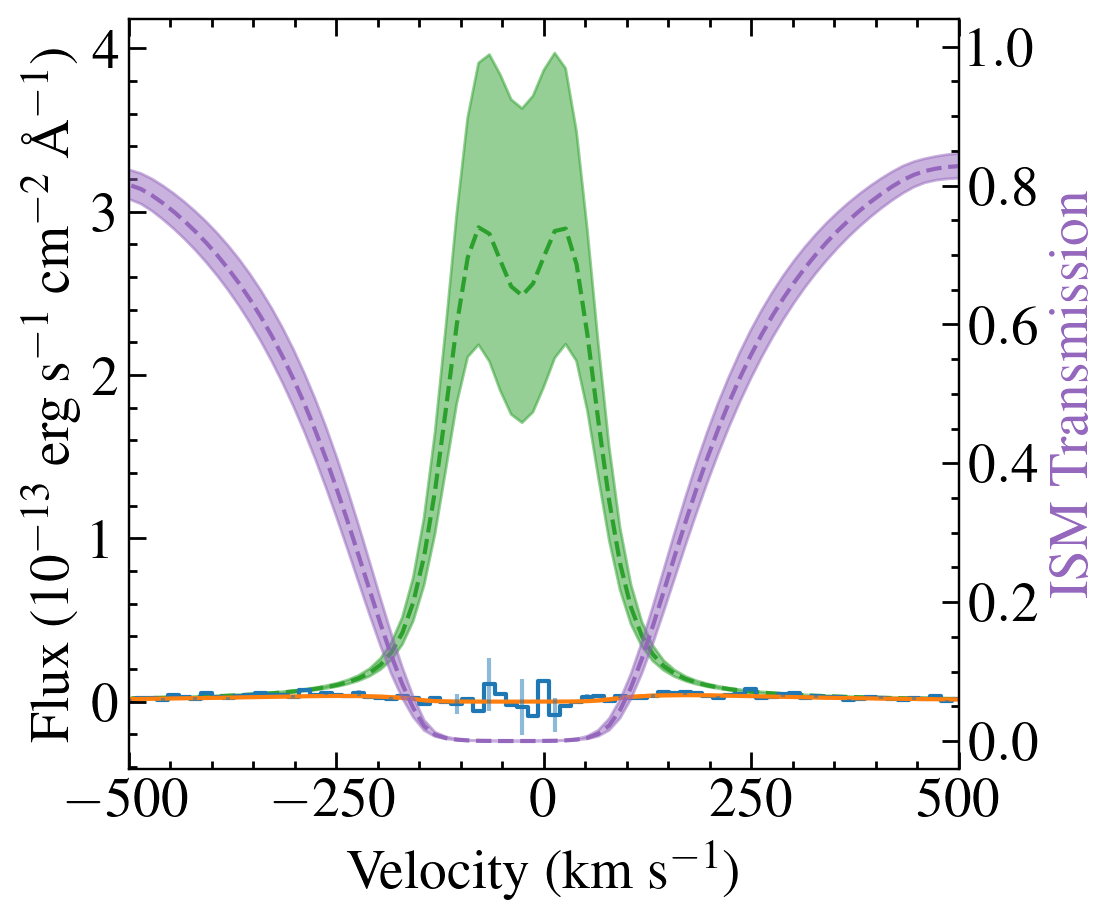

In [43]:
lyapath = '/media/david/2tb_ext_hd/hddata/meats/lya/toi-836/TOI836_forcedhigh_2ISM_LyA_MCMC_results.csv'
data = Table.read(lyapath)
data.dtype.names

lya = 1215.67
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale

fig, ax= plt.subplots(figsize=(6,5))
v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
ax.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
ax.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
ax.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
ax.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)

ax.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
ax.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)


fmax, fmin = np.max(data['lya_intrinsic_high_1sig']*fscale), np.min(data['flux_lya']*fscale)
# if fmin < 0:
#     ax.set_ylim(fmin*1.05, fmax*1.05)
# else:
#     ax.set_ylim(fmin*0.95, fmax*1.05)

# ax.set_ylim(-0.02*fmax, fmax*1.05)
# name = os.path.split(spec)[1][:-34]
# ax.set_title(name, size=20)

# xlim = min([abs(min(v.value)), max(v.value)])-10
xlim = 500
ax.set_xlim(-xlim, xlim)
ax2=ax.twinx()
ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
ax2.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
ax2.set_ylim(-0.04, 1.04)
ax2.set_ylabel('ISM Transmission', color='C4')


ax.set_xlabel('Velocity (km s$^{-1}$)', size=20)
ax.set_ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)

fig.tight_layout()
# print(data['h1_col value'][0:5])
# print(data['lya_model unconvolved_fluxes'][0:5])

lw, lf = data['wave_lya'], data['lya_intrinsic_median']

# fig.savefig('plots/toi-776_lya.pdf')

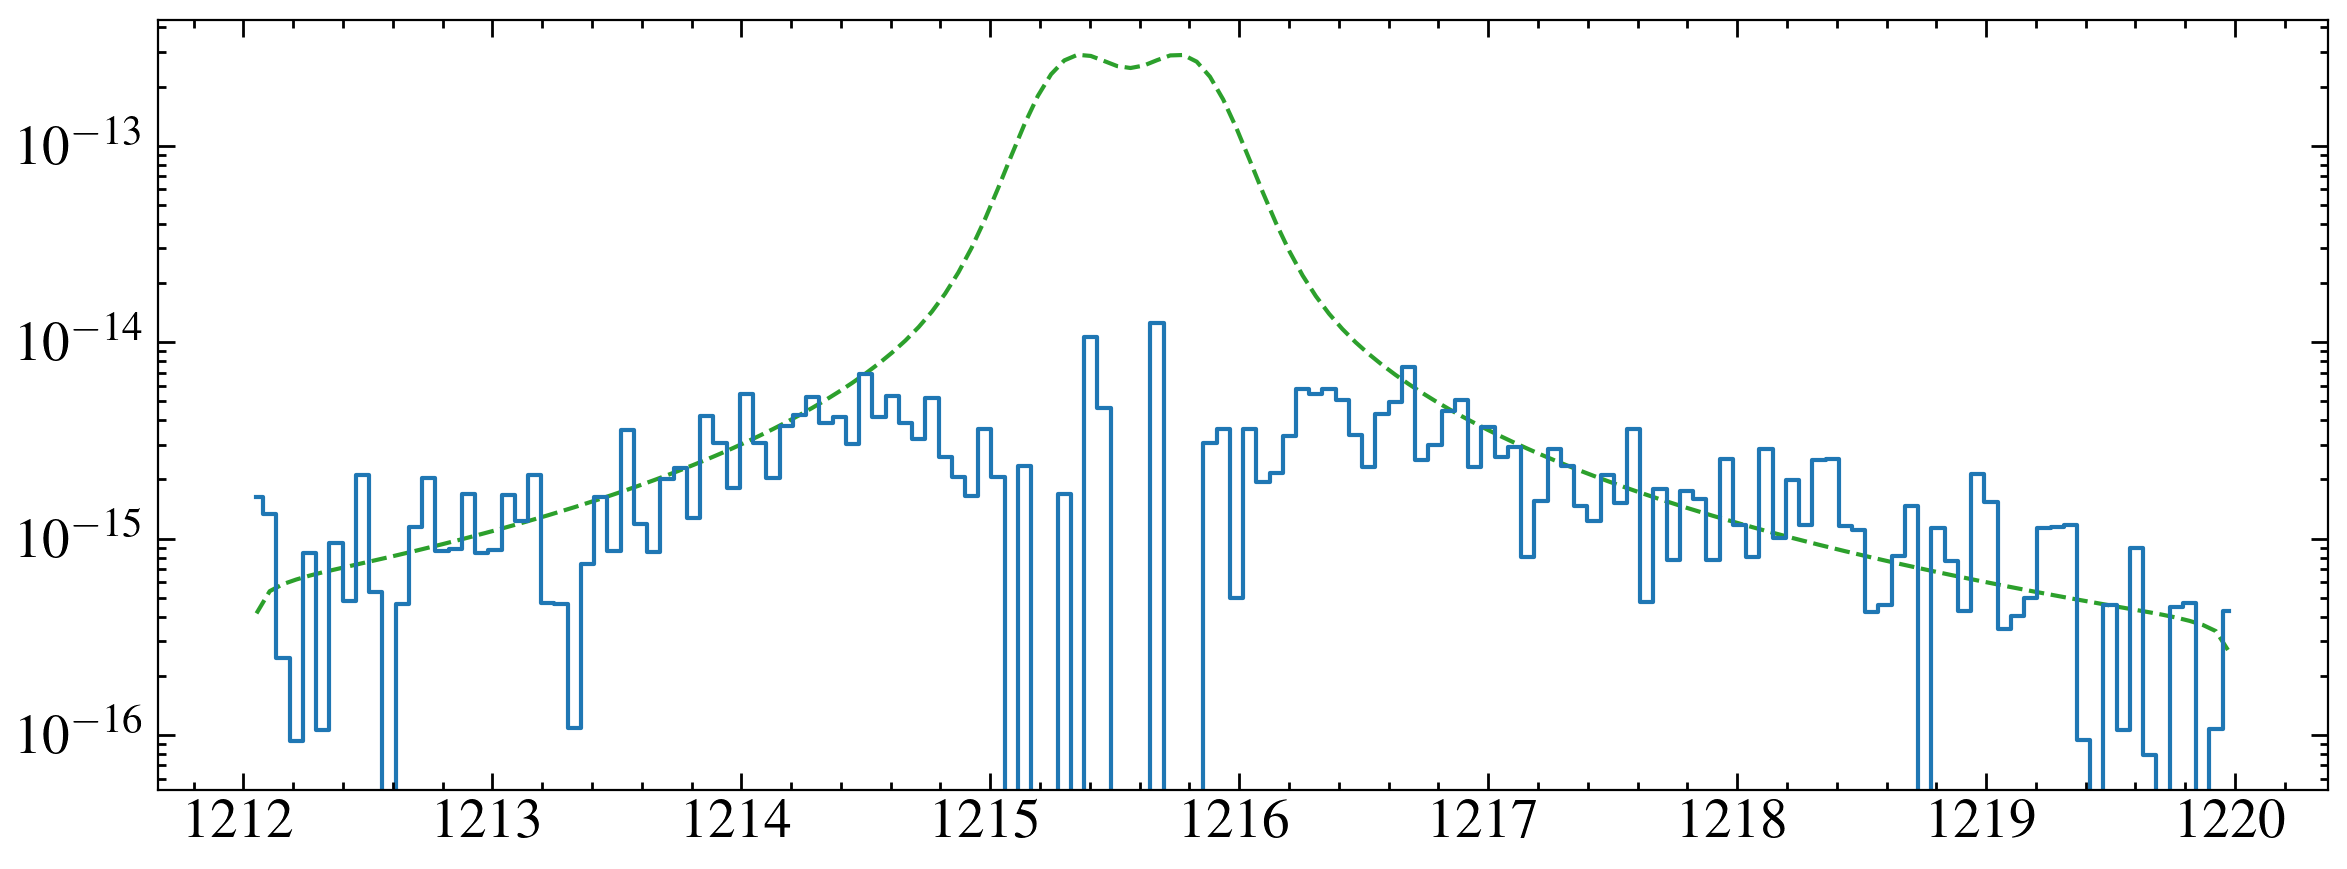

In [48]:
fig, ax = plt.subplots()

# data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
ax.step(data['wave_lya'], data['flux_lya'], c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
ax.plot(data['wave_lya'], data['lya_intrinsic_median'], c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)


# ax.set_xlim(1214, 1217)
ax.set_yscale('log')

Ok does look better om a log scale

In [50]:

lw, lf, le = data['wave_lya'], data['lya_intrinsic_median'], np.mean([data['lya_intrinsic_high_1sig']-data['lya_intrinsic_median'], data['lya_intrinsic_median']-data['lya_intrinsic_low_1sig']], axis=0)
lyatab = Table([lw, lf, le], names=['WAVELENGTH', 'FLUX', 'ERROR'])
lyatab.write('models/toi-836_lya.ecsv', overwrite=True)

prepare_model.make_model_spectrum('models/toi-836_lya.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1, model_name='lya')


Spectrum saved as hlsp_muscles_model_lya_toi-836_na_v1_component-spec.fits


In [97]:
# fig, axes = plt.subplots(ncols=2)
# wav = np.arange(1000)
# spec = np.random.normal(0, 0.5, size=len(wav))

# mod = models.Gaussian1D(3, 205, 5) + models.Gaussian1D(5, 600, 7)
# spec += mod(wav)
# axes[0].plot(wav, spec)

# ints = []
# nnegs = []
# ints.append(np.trapz(spec, wav))
# nspec = np.copy(spec)
# nwav = np.copy(wav)
# n = 0
# while len(nspec[1:-1][nspec[1:-1] < 0.0]) > 0 and n < 10000:
#     n +=1
#     lenspec = len(nspec)
#     nnegs.append(len(nspec[1:-1][nspec[1:-1] < 0]))
#     # print(lenspec)
#     minarg = np.argmin(nspec)
#     # print(minarg)
#     if minarg not in (0, lenspec-1):
#         newf = np.mean(nspec[minarg-1:minarg+2])
#         # print(nspec[minarg-2:minarg+3], newf)
#         nspec[minarg] = newf
#         nspec = np.delete(nspec, [minarg-1, minarg+1])
#         nwav = np.delete(nwav, [minarg-1, minarg+1])
#         # print(nspec[minarg-2:minarg+1], newf)
        
#     ints.append(np.trapz(nspec, nwav))

# axes[0].plot(nwav, nspec, alpha=0.5)

# axes[1].plot(np.arange(len(ints)), ints)
# axes[1].plot(np.arange(len(nnegs)), nnegs)
# print(np.min(nnegs))

In [78]:
np.mean([0.59895796, -1.74450352,  0.89712448])

-0.08280702666666666